In [7]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statistics


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# EDA & estandarización
# ==============================================================================
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

# balanceo
# ==============================================================================
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Guardar modelo
# ==============================================================================
import pickle

# Preprocesado y modelado
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv("datos/creditcardmarketing.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


Vamos a nombrar las columnas de nuestro dataframe

In [9]:
df.columns=["Customer_Number","Offer_Accepted","Reward","Mailer_Type","Income_Level","Bank_Accounts_Open","Overdraft_Protection","Credit_Rating","Credit_Cards_Held","Homes_Owned","Household_Size","Own_Your_Home","Average_Balance_Q1","Average_Balance_Q2","Average_Balance_Q3","Average_Balance_Q4","Balance"]
df.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


# EDA

Vamos primero a analizar los datos que tenemos:
- Info: para ver el tipo de datos y nulos por columna
- Describe: para ver las estadísticas más importantes de columnas numéricas y no numéricas
- is.null: para ver el porcentaje de nulos que tenemos
- Duplicated: para ver si tenemos alguna columna duplicada

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_Number       18000 non-null  int64  
 1   Offer_Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer_Type           18000 non-null  object 
 4   Income_Level          18000 non-null  object 
 5   Bank_Accounts_Open    18000 non-null  int64  
 6   Overdraft_Protection  18000 non-null  object 
 7   Credit_Rating         18000 non-null  object 
 8   Credit_Cards_Held     18000 non-null  int64  
 9   Homes_Owned           18000 non-null  int64  
 10  Household_Size        18000 non-null  int64  
 11  Own_Your_Home         18000 non-null  object 
 12  Average_Balance_Q1    17976 non-null  float64
 13  Average_Balance_Q2    17976 non-null  float64
 14  Average_Balance_Q3    17976 non-null  float64
 15  Average_Balance_Q4 

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,18000.0,9000.500000,5196.296758,1.00,4500.75,9000.5,13500.25,18000.00
Bank_Accounts_Open,18000.0,1.255778,0.472501,1.00,1.00,1.0,1.00,3.00
Credit_Cards_Held,18000.0,1.903500,0.797009,1.00,1.00,2.0,2.00,4.00
Homes_Owned,18000.0,1.203444,0.427341,1.00,1.00,1.0,1.00,3.00
Household_Size,18000.0,3.499056,1.114182,1.00,3.00,3.0,4.00,9.00
Average_Balance_Q1,17976.0,940.515562,350.297837,48.25,787.50,1007.0,1153.25,3366.25
Average_Balance_Q2,17976.0,910.450656,620.077060,0.00,392.75,772.0,1521.00,3450.00
Average_Balance_Q3,17976.0,999.392190,457.402268,0.00,663.00,1032.0,1342.00,3421.00
Average_Balance_Q4,17976.0,1042.033600,553.452599,0.00,633.00,945.5,1463.00,3823.00
Balance,17976.0,810.185803,559.001365,0.00,363.00,703.0,1212.00,4215.00


In [12]:
df.describe(include="object").T

,count,unique,top,freq
Offer_Accepted,18000,2,No,16977
Reward,18000,3,Air Miles,6061
Mailer_Type,18000,2,Postcard,9147
Income_Level,18000,3,Medium,9013
Overdraft_Protection,18000,2,No,15322
Credit_Rating,18000,3,High,6071
Own_Your_Home,18000,2,Yes,11655


In [13]:
df.isnull().sum()/df.shape[0]*100

Customer_Number         0.000000
Offer_Accepted          0.000000
Reward                  0.000000
Mailer_Type             0.000000
Income_Level            0.000000
Bank_Accounts_Open      0.000000
Overdraft_Protection    0.000000
Credit_Rating           0.000000
Credit_Cards_Held       0.000000
Homes_Owned             0.000000
Household_Size          0.000000
Own_Your_Home           0.000000
Average_Balance_Q1      0.133333
Average_Balance_Q2      0.133333
Average_Balance_Q3      0.133333
Average_Balance_Q4      0.133333
Balance                 0.133333
dtype: float64

In [14]:
df.duplicated().sum()

0

Tenemos algunos nulos que habrá que ver que hacemos más tarde con ellos. 

No hay ningún duplicado.

La VR es categórica, por lo que no hace falta hacer una representación normal al haber solo dos categorías. Vamos a representarla con un "Countplot".

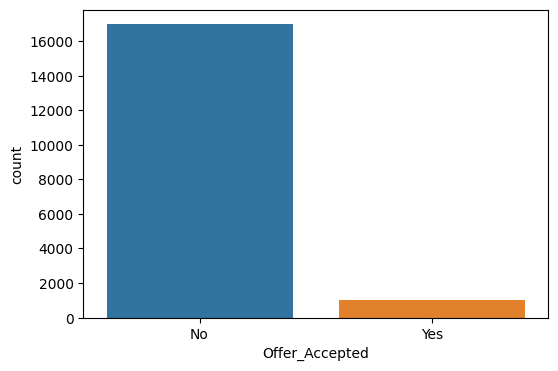

In [15]:
# Crear una figura de 8x6 pulgadas
fig, ax = plt.subplots(figsize=(6, 4))

# Trazar el gráfico de barras en la figura
sns.countplot(data=df, x='Offer_Accepted', ax=ax)

# Mostrar el gráfico
plt.show()

Vemos que el modelo no está balanceado, ya que hay muchas más ofertas no aceptadas que aceptadas.

Habrá que hacer un balanceo.

Vamos a representar la relación de la VR con las VP numéricas. Usamos un "histplot".

De está gráfica eliminamos las columnas numéricas discretas ya que no me aportarían información. Las veremos más adelante junto con las categóricas.

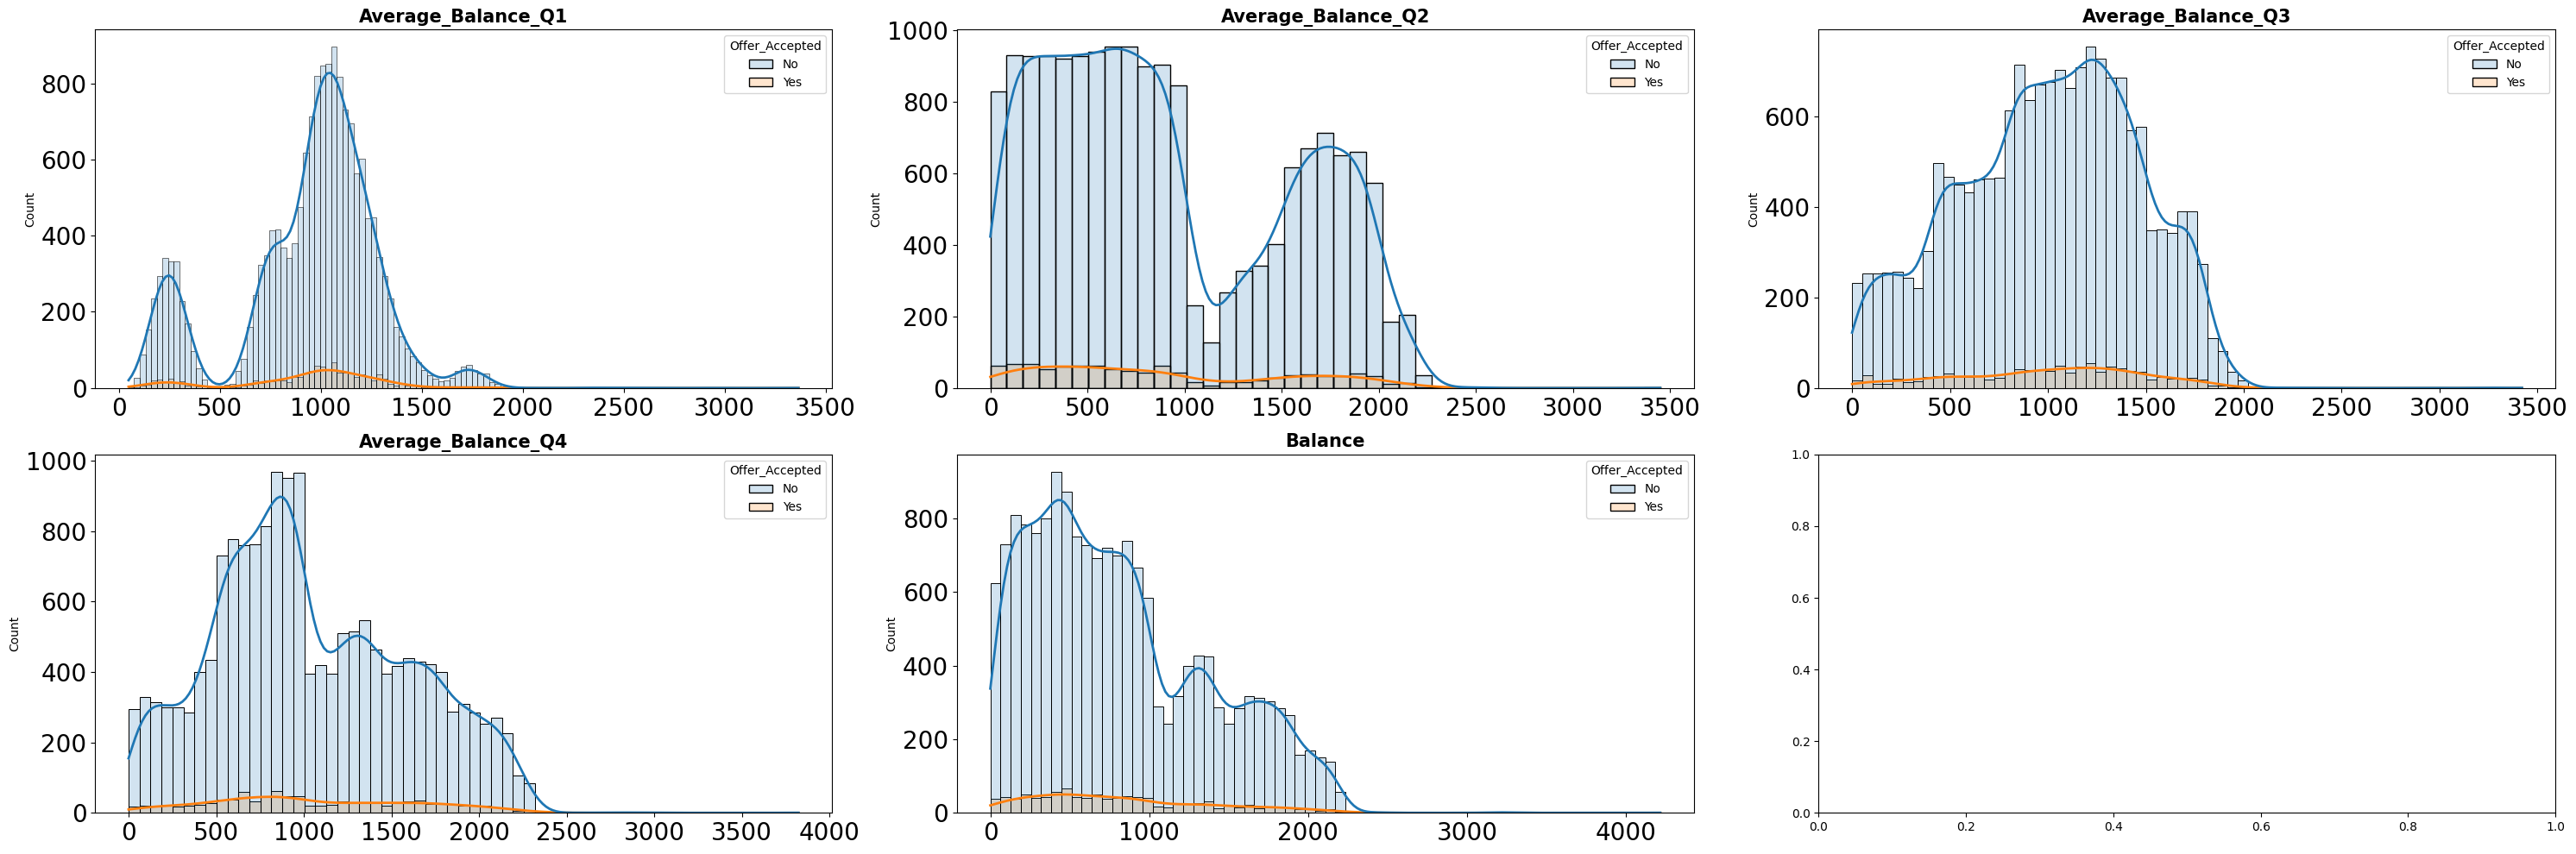

In [16]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number)
columnas_numeric.drop(['Customer_Number',"Bank_Accounts_Open","Credit_Cards_Held","Homes_Owned","Household_Size"], axis=1, inplace=True)

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i],
        hue = df['Offer_Accepted']
        )
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();# Gráfico de distribución para cada variable numérica


Vemos que las VP de tipo numérico están desviadas a la derecha

El siguiente paso será representar las VR categóricas. Utilizamos de nuevo un "countplot".

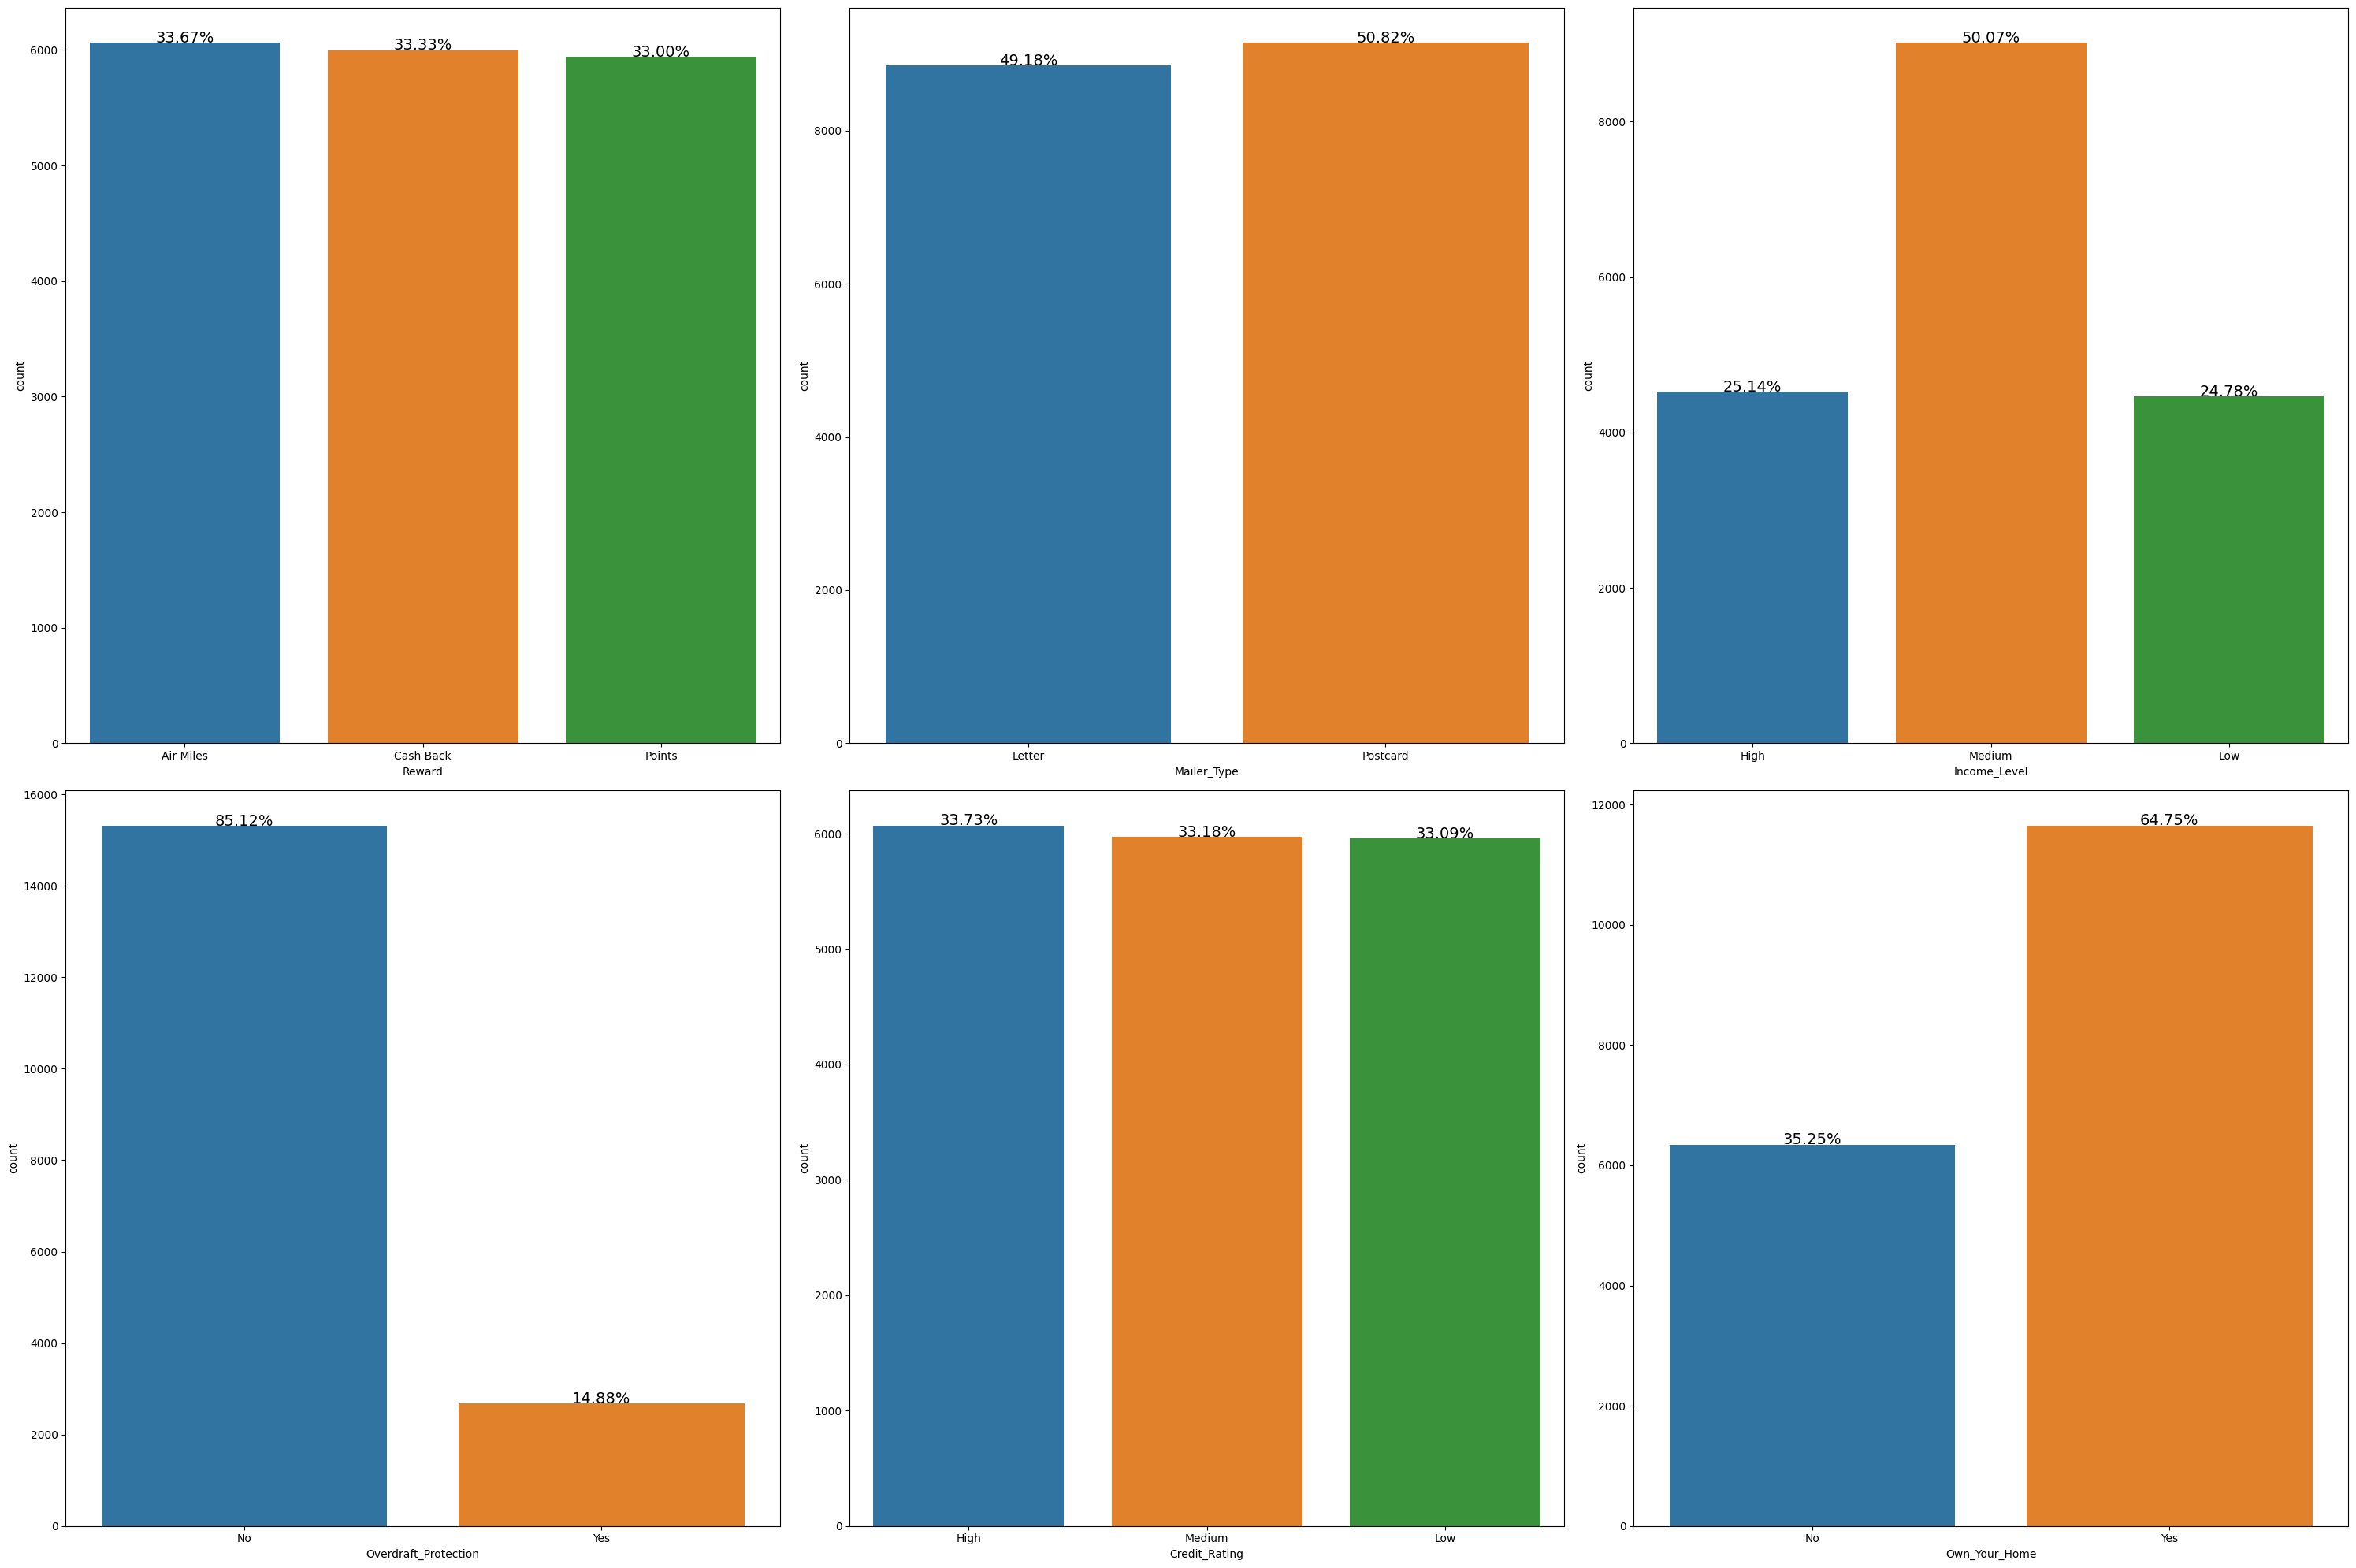

In [17]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 20))

axes = axes.flat

columnas_no_numeric = df.select_dtypes(include="object")
columnas_no_numeric.drop(['Offer_Accepted'], axis=1, inplace=True)

for i, colum in enumerate(columnas_no_numeric):
    ax = sns.countplot(x=df[colum], ax=axes[i])
    total = float(len(df[colum]))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3,
                '{:.2f}%'.format((height / total) * 100),
                ha='center', fontsize=14) # aumentar el tamaño del texto del porcentaje)
        
fig.tight_layout()

Vemos que hay 3 que claramente serán ordinales a la hora de hacer el encoding. He añadido los porcentajes a cada columna para poder asegurarme del orden.
- Income_level: Medium es claramente más importante, mientras que high y low son practicamente iguales.
- Overdraft_Protection: No es más importante que Yes
- Own_your_Home: Yes es más importante que No

Vamos a hacer también gráficas para las columnas numéricas discretas.

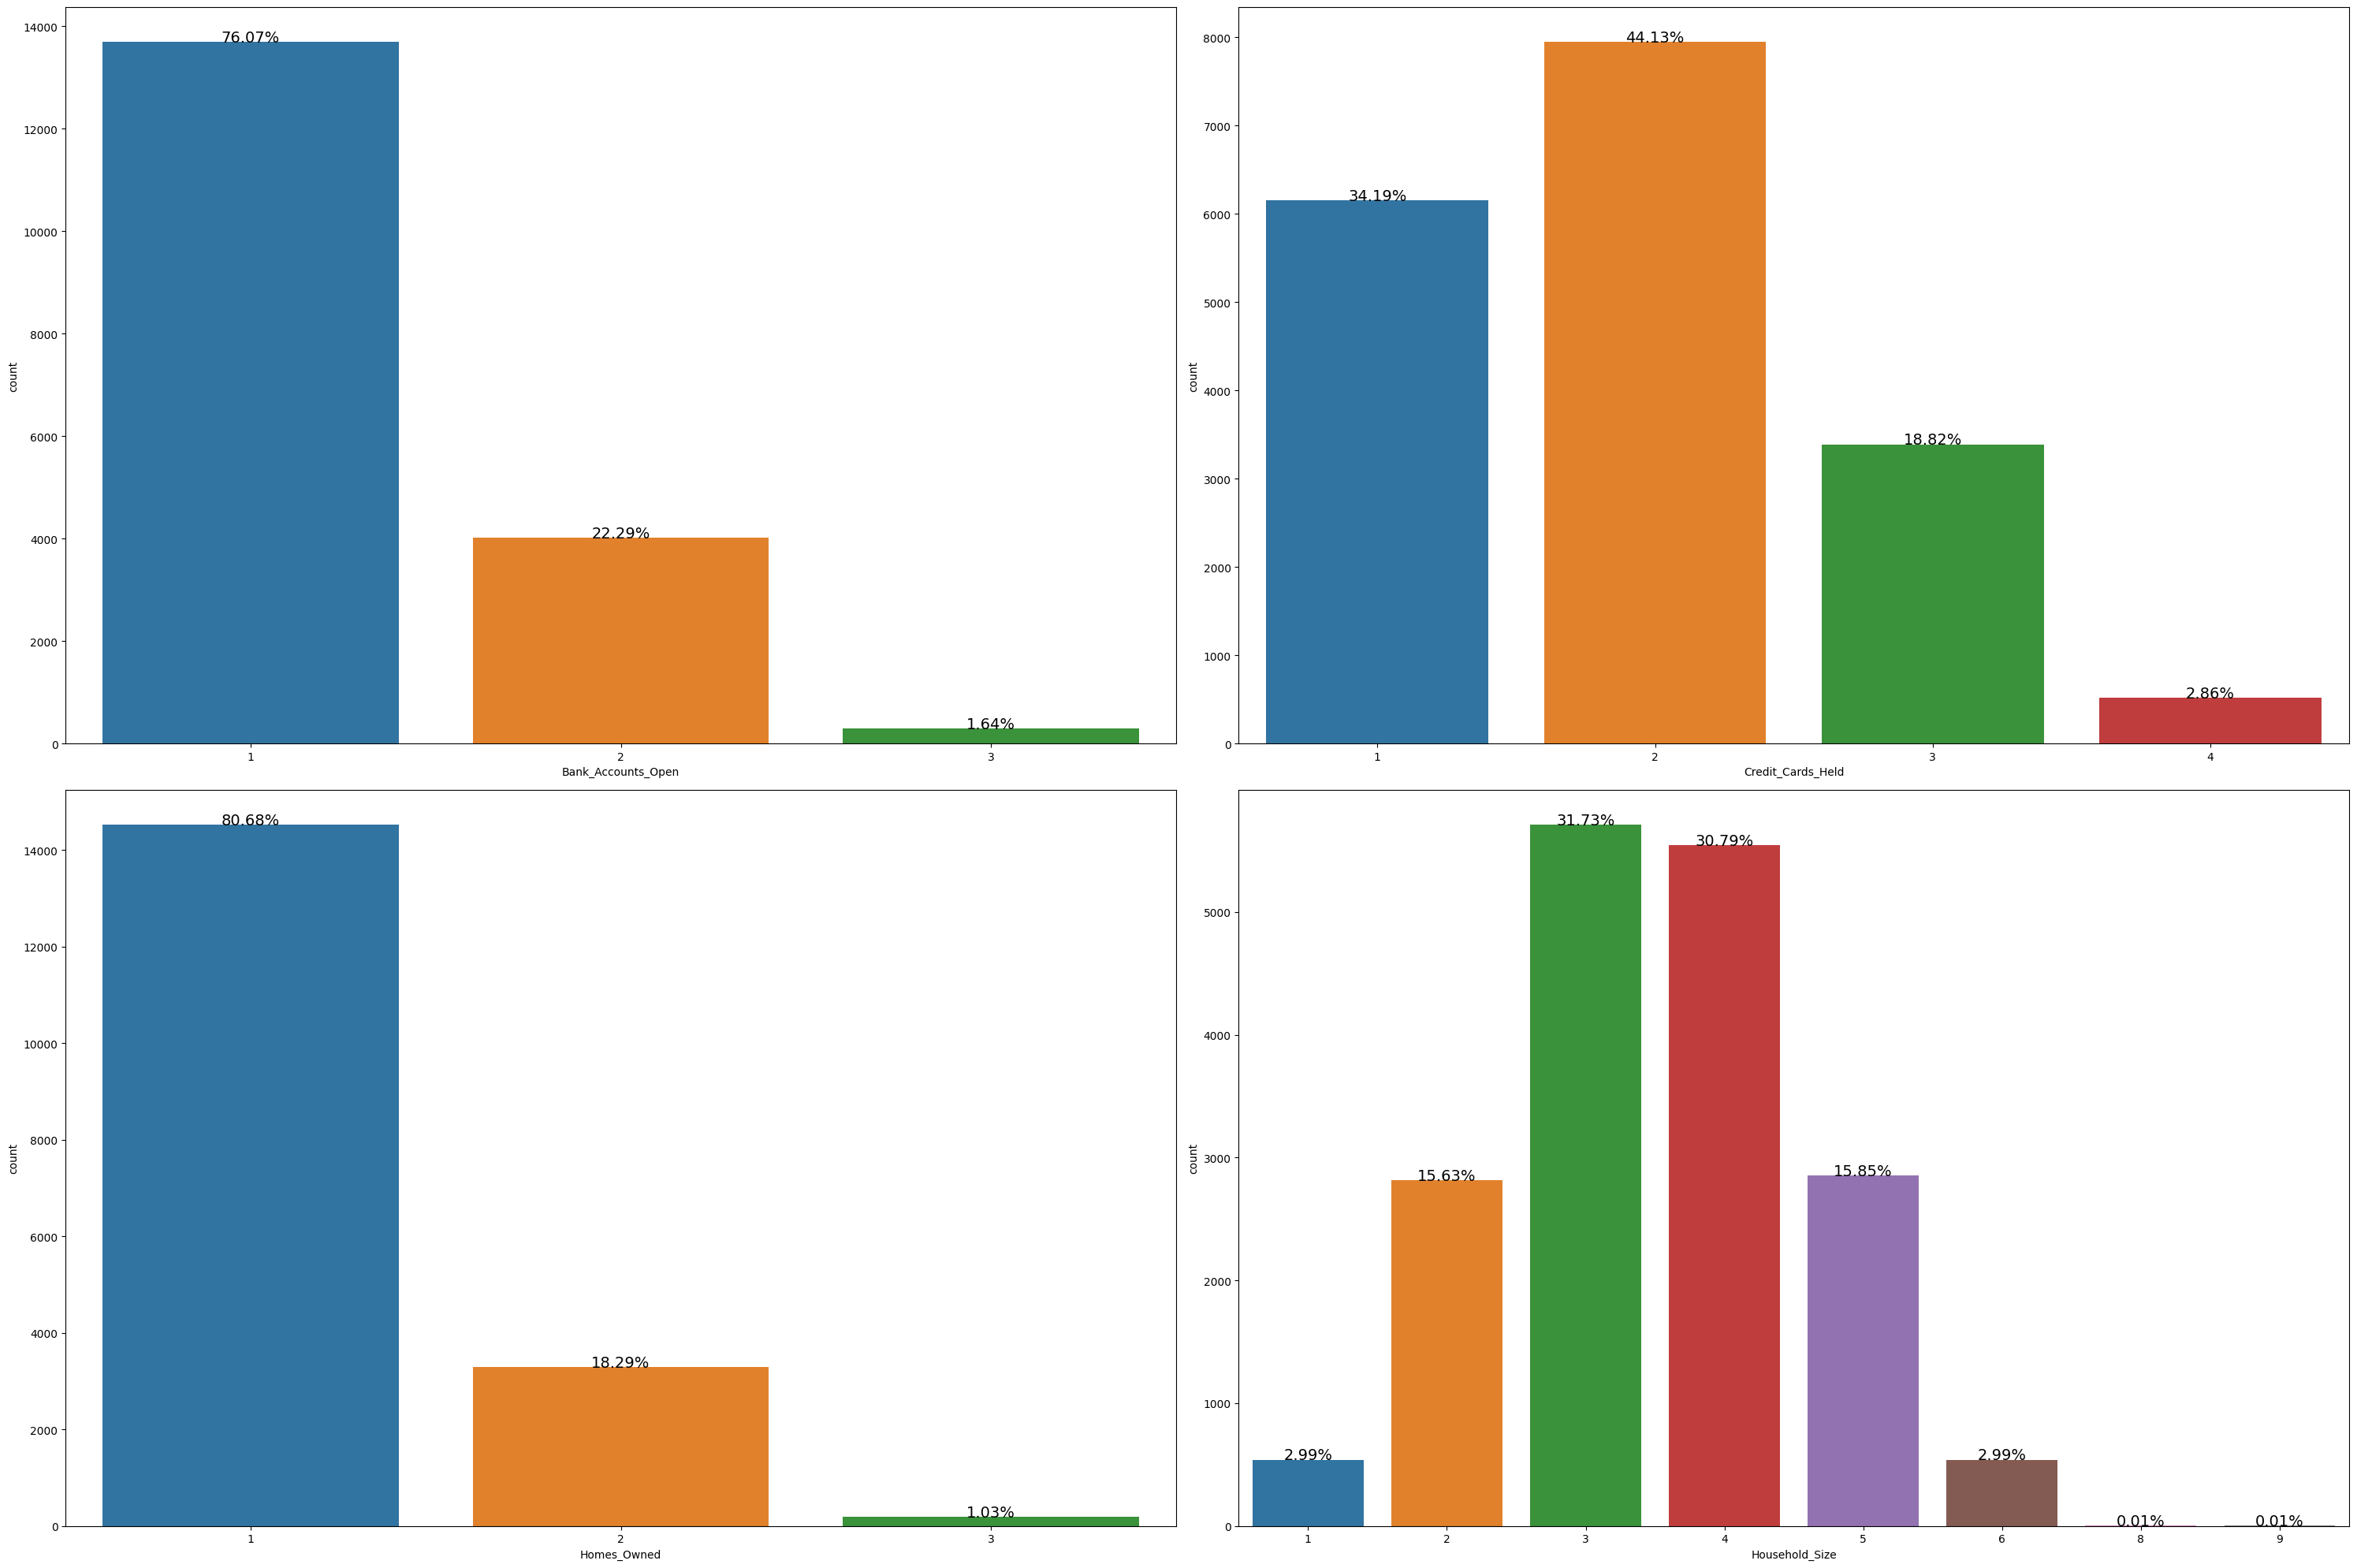

In [18]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 20))

axes = axes.flat

columnas_discretas = df.loc[:,["Bank_Accounts_Open","Credit_Cards_Held","Homes_Owned","Household_Size"]]

for i, colum in enumerate(columnas_discretas):
    ax = sns.countplot(x=df[colum], ax=axes[i])
    total = float(len(df[colum]))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3,
                '{:.2f}%'.format((height / total) * 100),
                ha='center', fontsize=14) # aumentar el tamaño del texto del porcentaje
        
fig.tight_layout()

Vamos a ver de manera más clara la relación que tiene Offer_Accepted con las variables discretas y categóricas

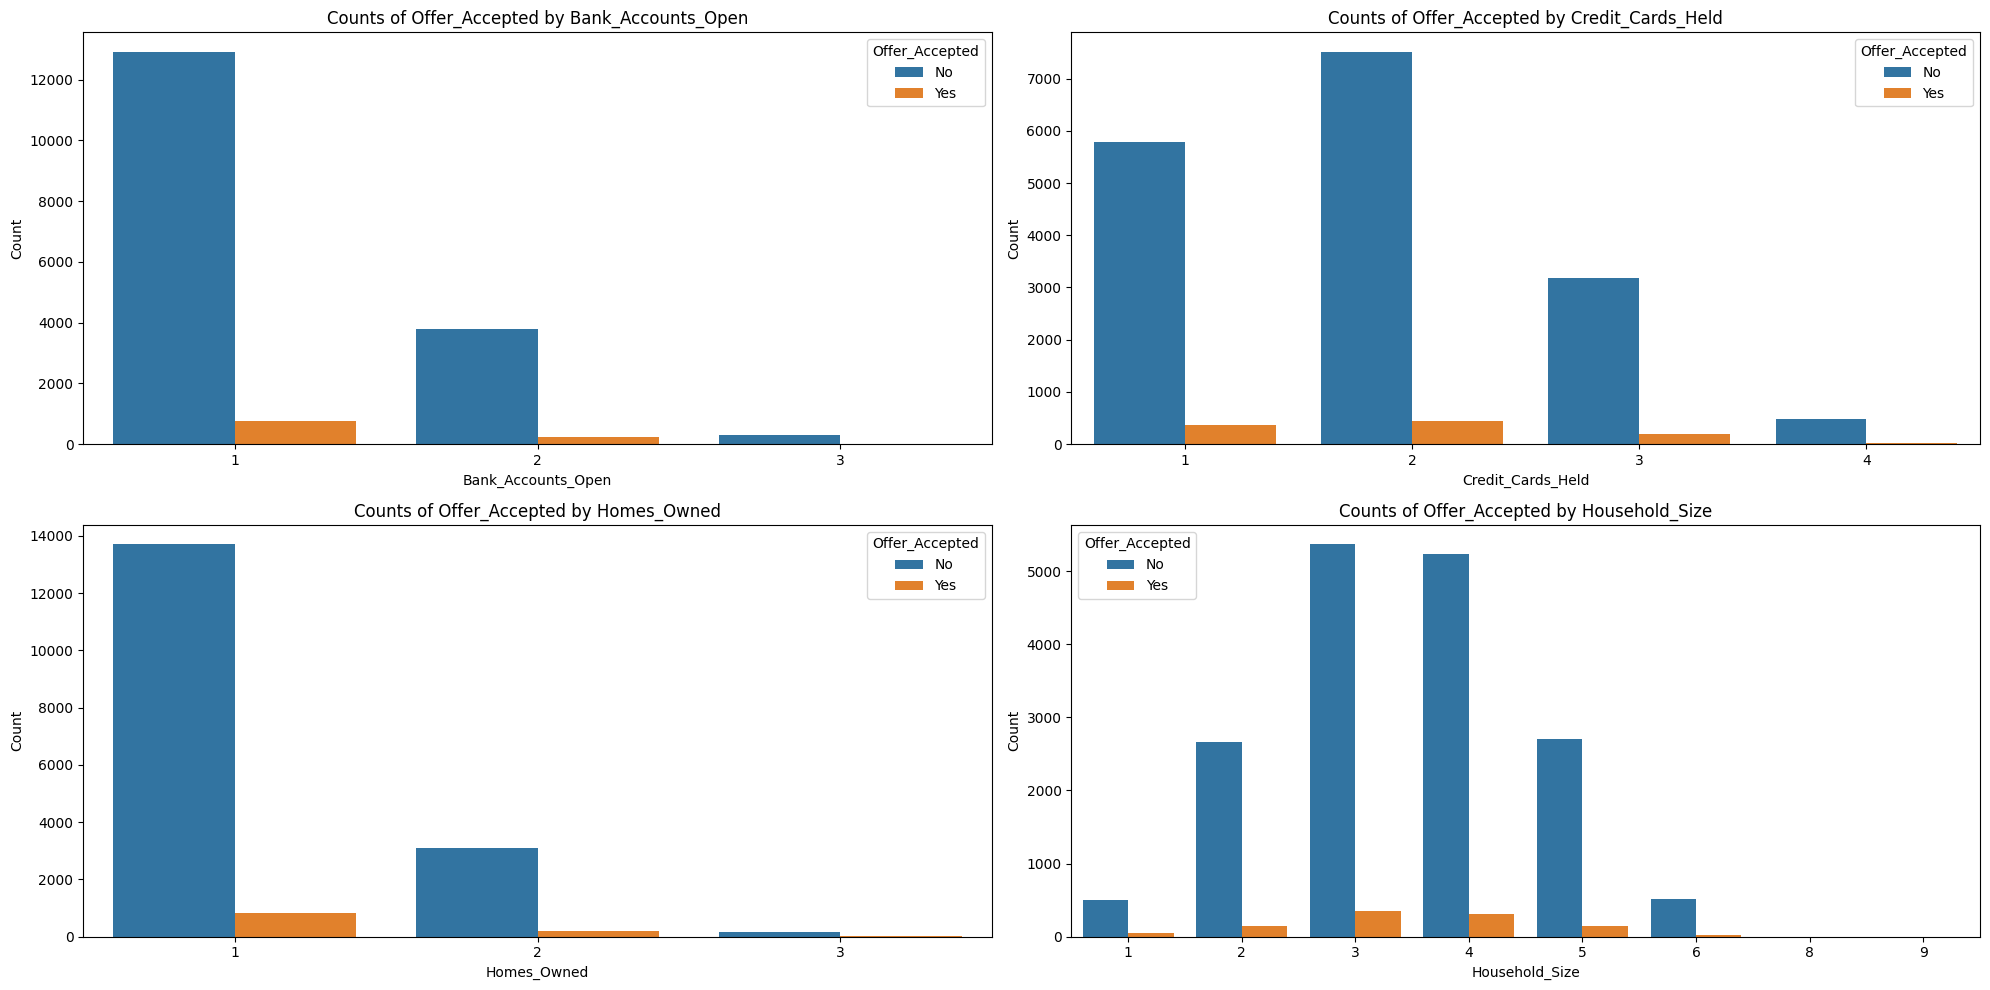

In [19]:
columnas_object = df.select_dtypes(include="object").columns

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.flat

for i, colum in enumerate(columnas_discretas):
    counts = df.groupby([colum, "Offer_Accepted"]).size().reset_index(name="count")
    sns.barplot(x=colum, y="count", hue="Offer_Accepted", data=counts, ax=axes[i])
    axes[i].set_title(f"Counts of Offer_Accepted by {colum}")
    axes[i].set_xlabel(colum)
    axes[i].set_ylabel("Count")


fig.tight_layout()
plt.show()


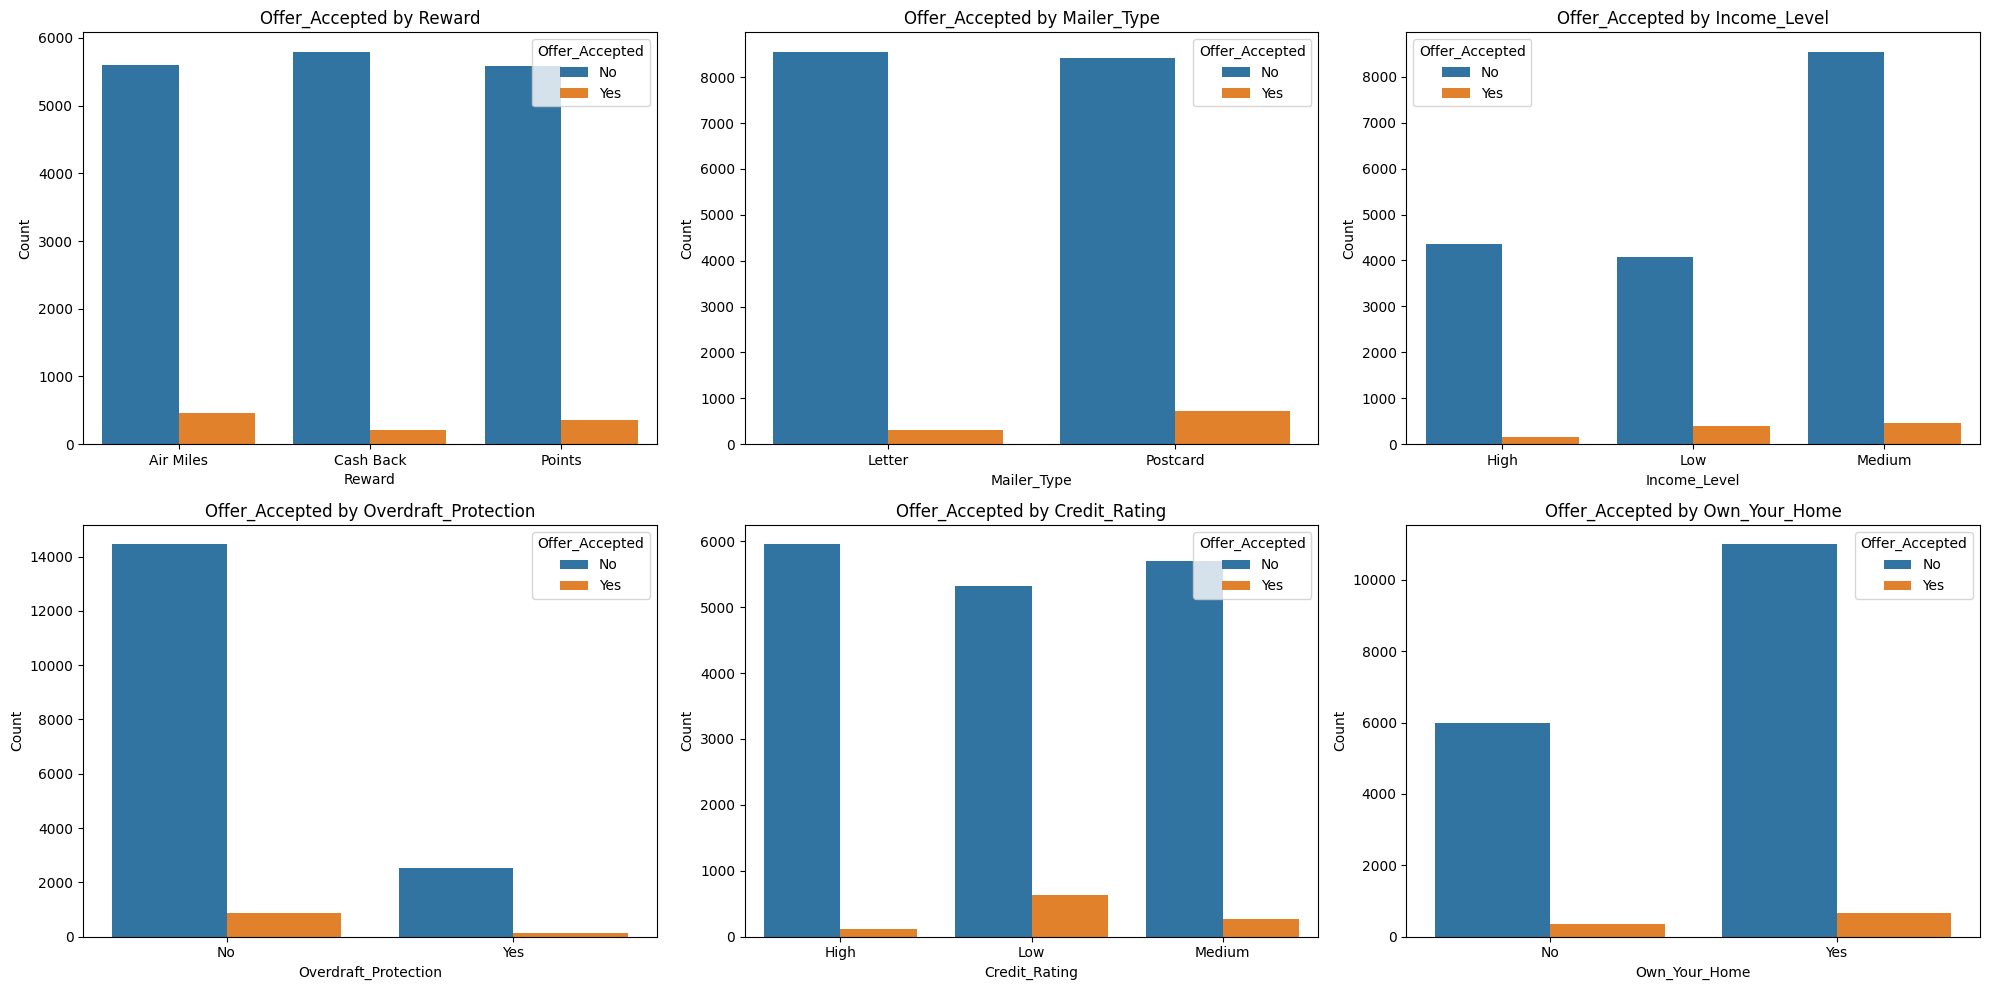

In [20]:

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flat

for i, colum in enumerate(columnas_no_numeric):
    counts = df.groupby([colum, "Offer_Accepted"]).size().reset_index(name="count")
    sns.barplot(x=colum, y="count", hue="Offer_Accepted", data=counts, ax=axes[i])
    axes[i].set_title(f"Offer_Accepted by {colum}")
    axes[i].set_xlabel(colum)
    axes[i].set_ylabel("Count")


fig.tight_layout()
plt.show()

Vamos a utilizar un "heatmap" para ver la correlación entre las variables.

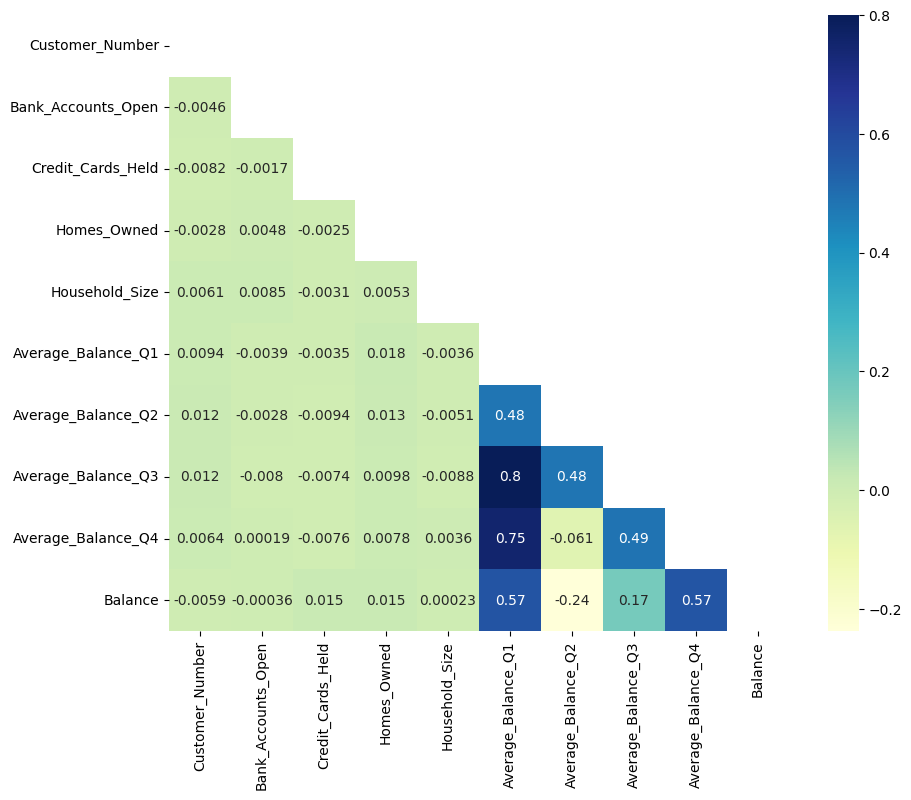

In [21]:
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

Vemos que la mayor correlación se da entre Balance y los Average_Balance

Vamos a visualizar los outliers con un boxplot

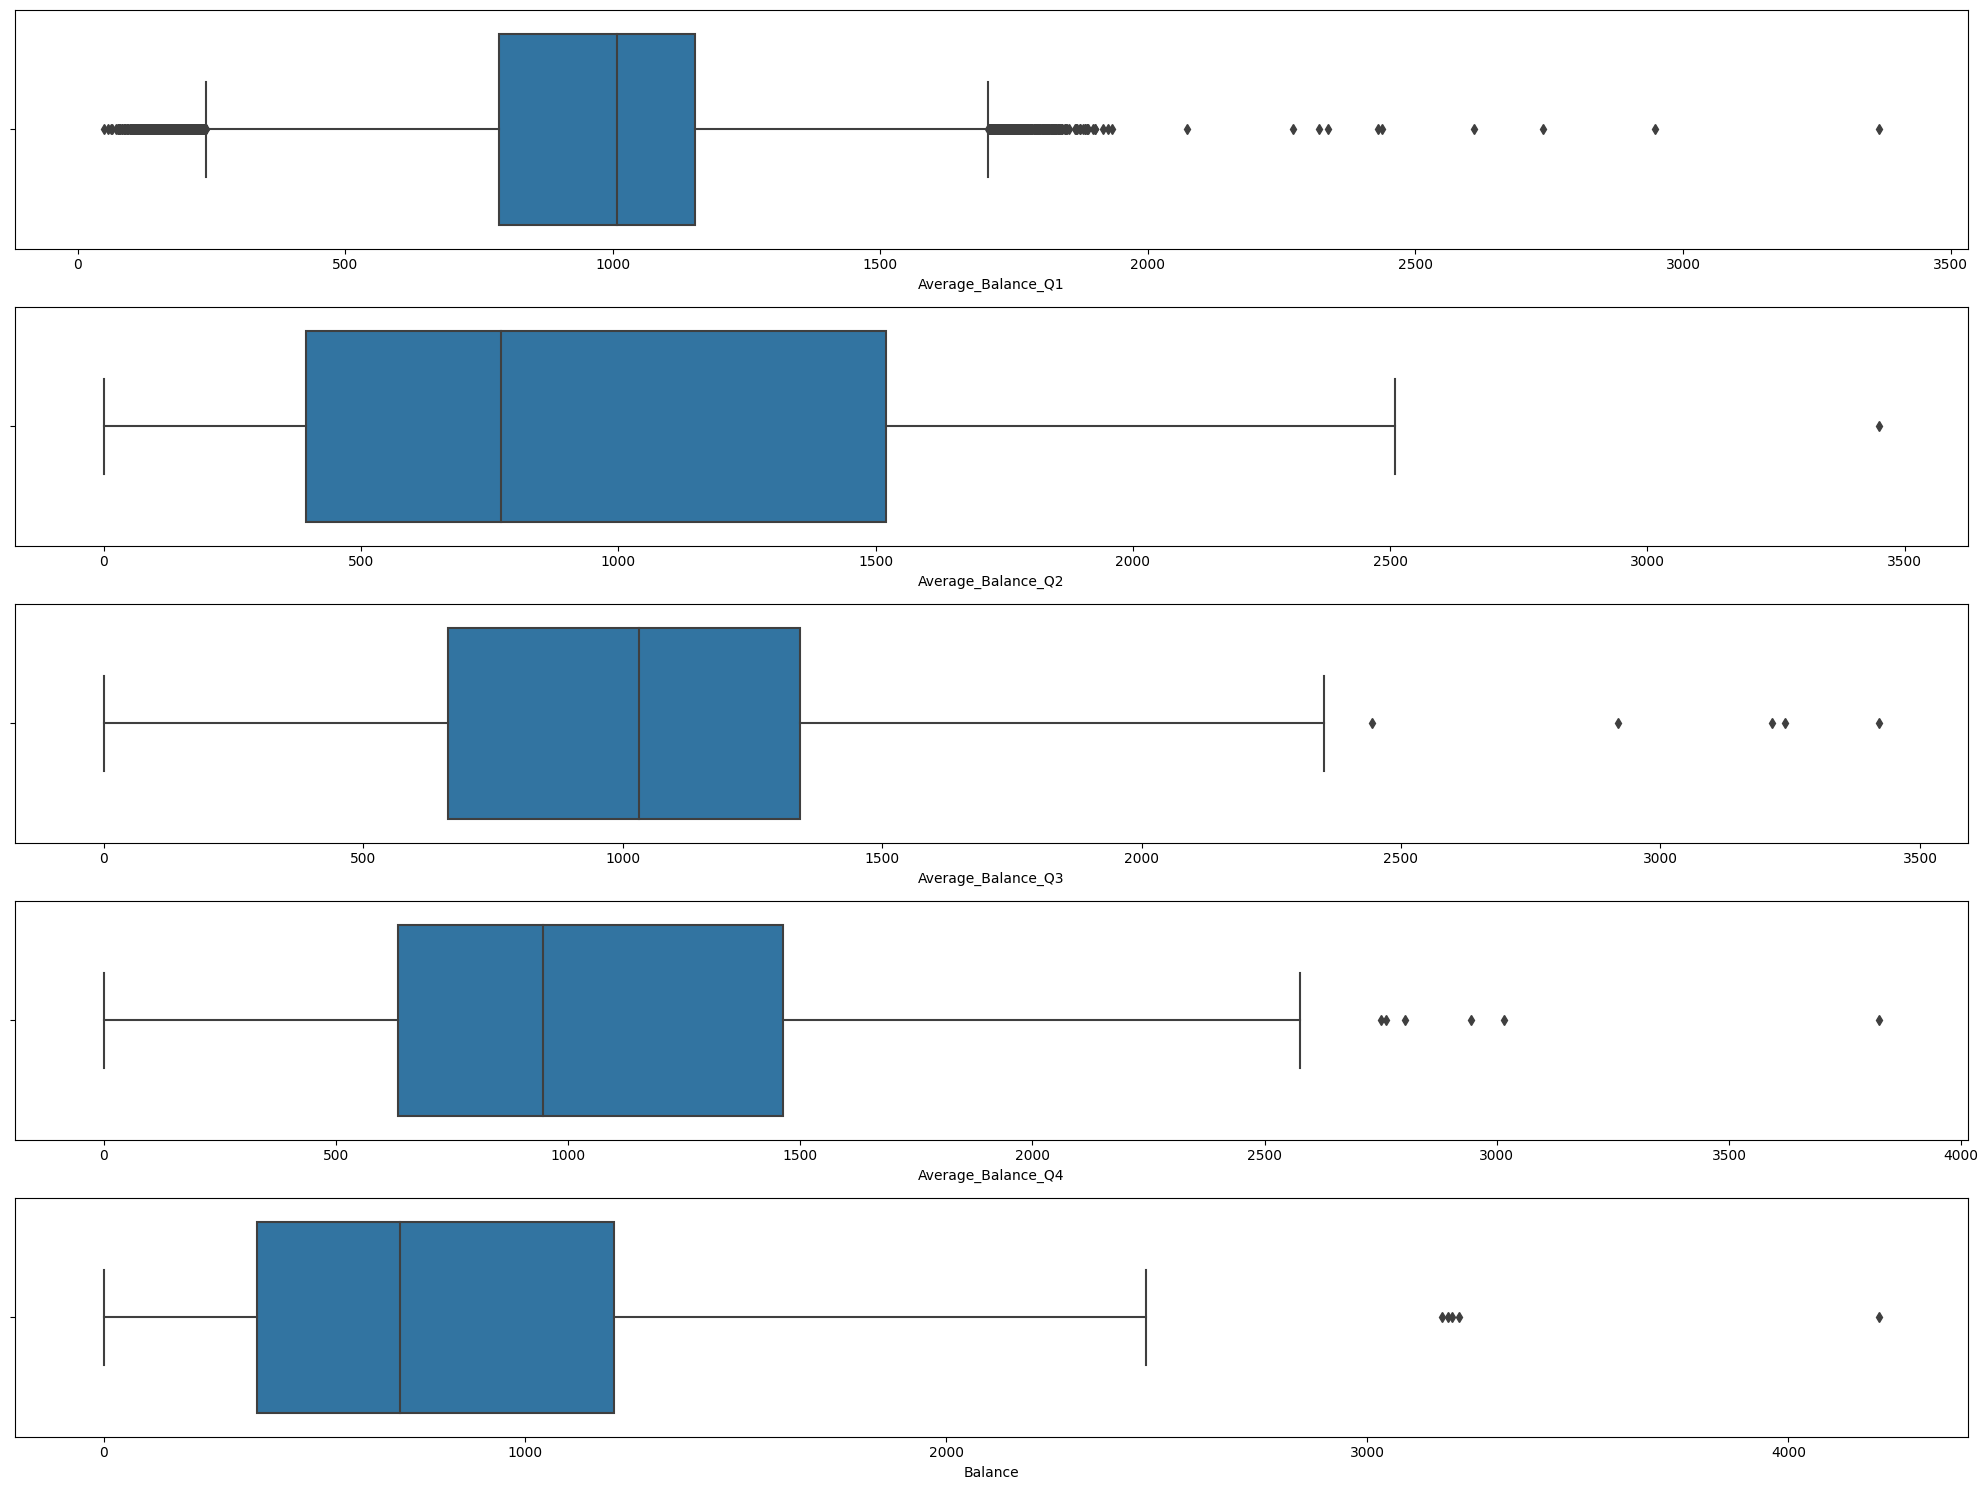

In [22]:

fig, ax = plt.subplots(5, 1, figsize=(20,15))

for i in range(len(columnas_numeric.columns)):
    sns.boxplot(x=columnas_numeric.columns[i], data=columnas_numeric, ax=ax[i])

fig.tight_layout();
plt.show()


Vamos a visualizar la coparación entre todas las variables

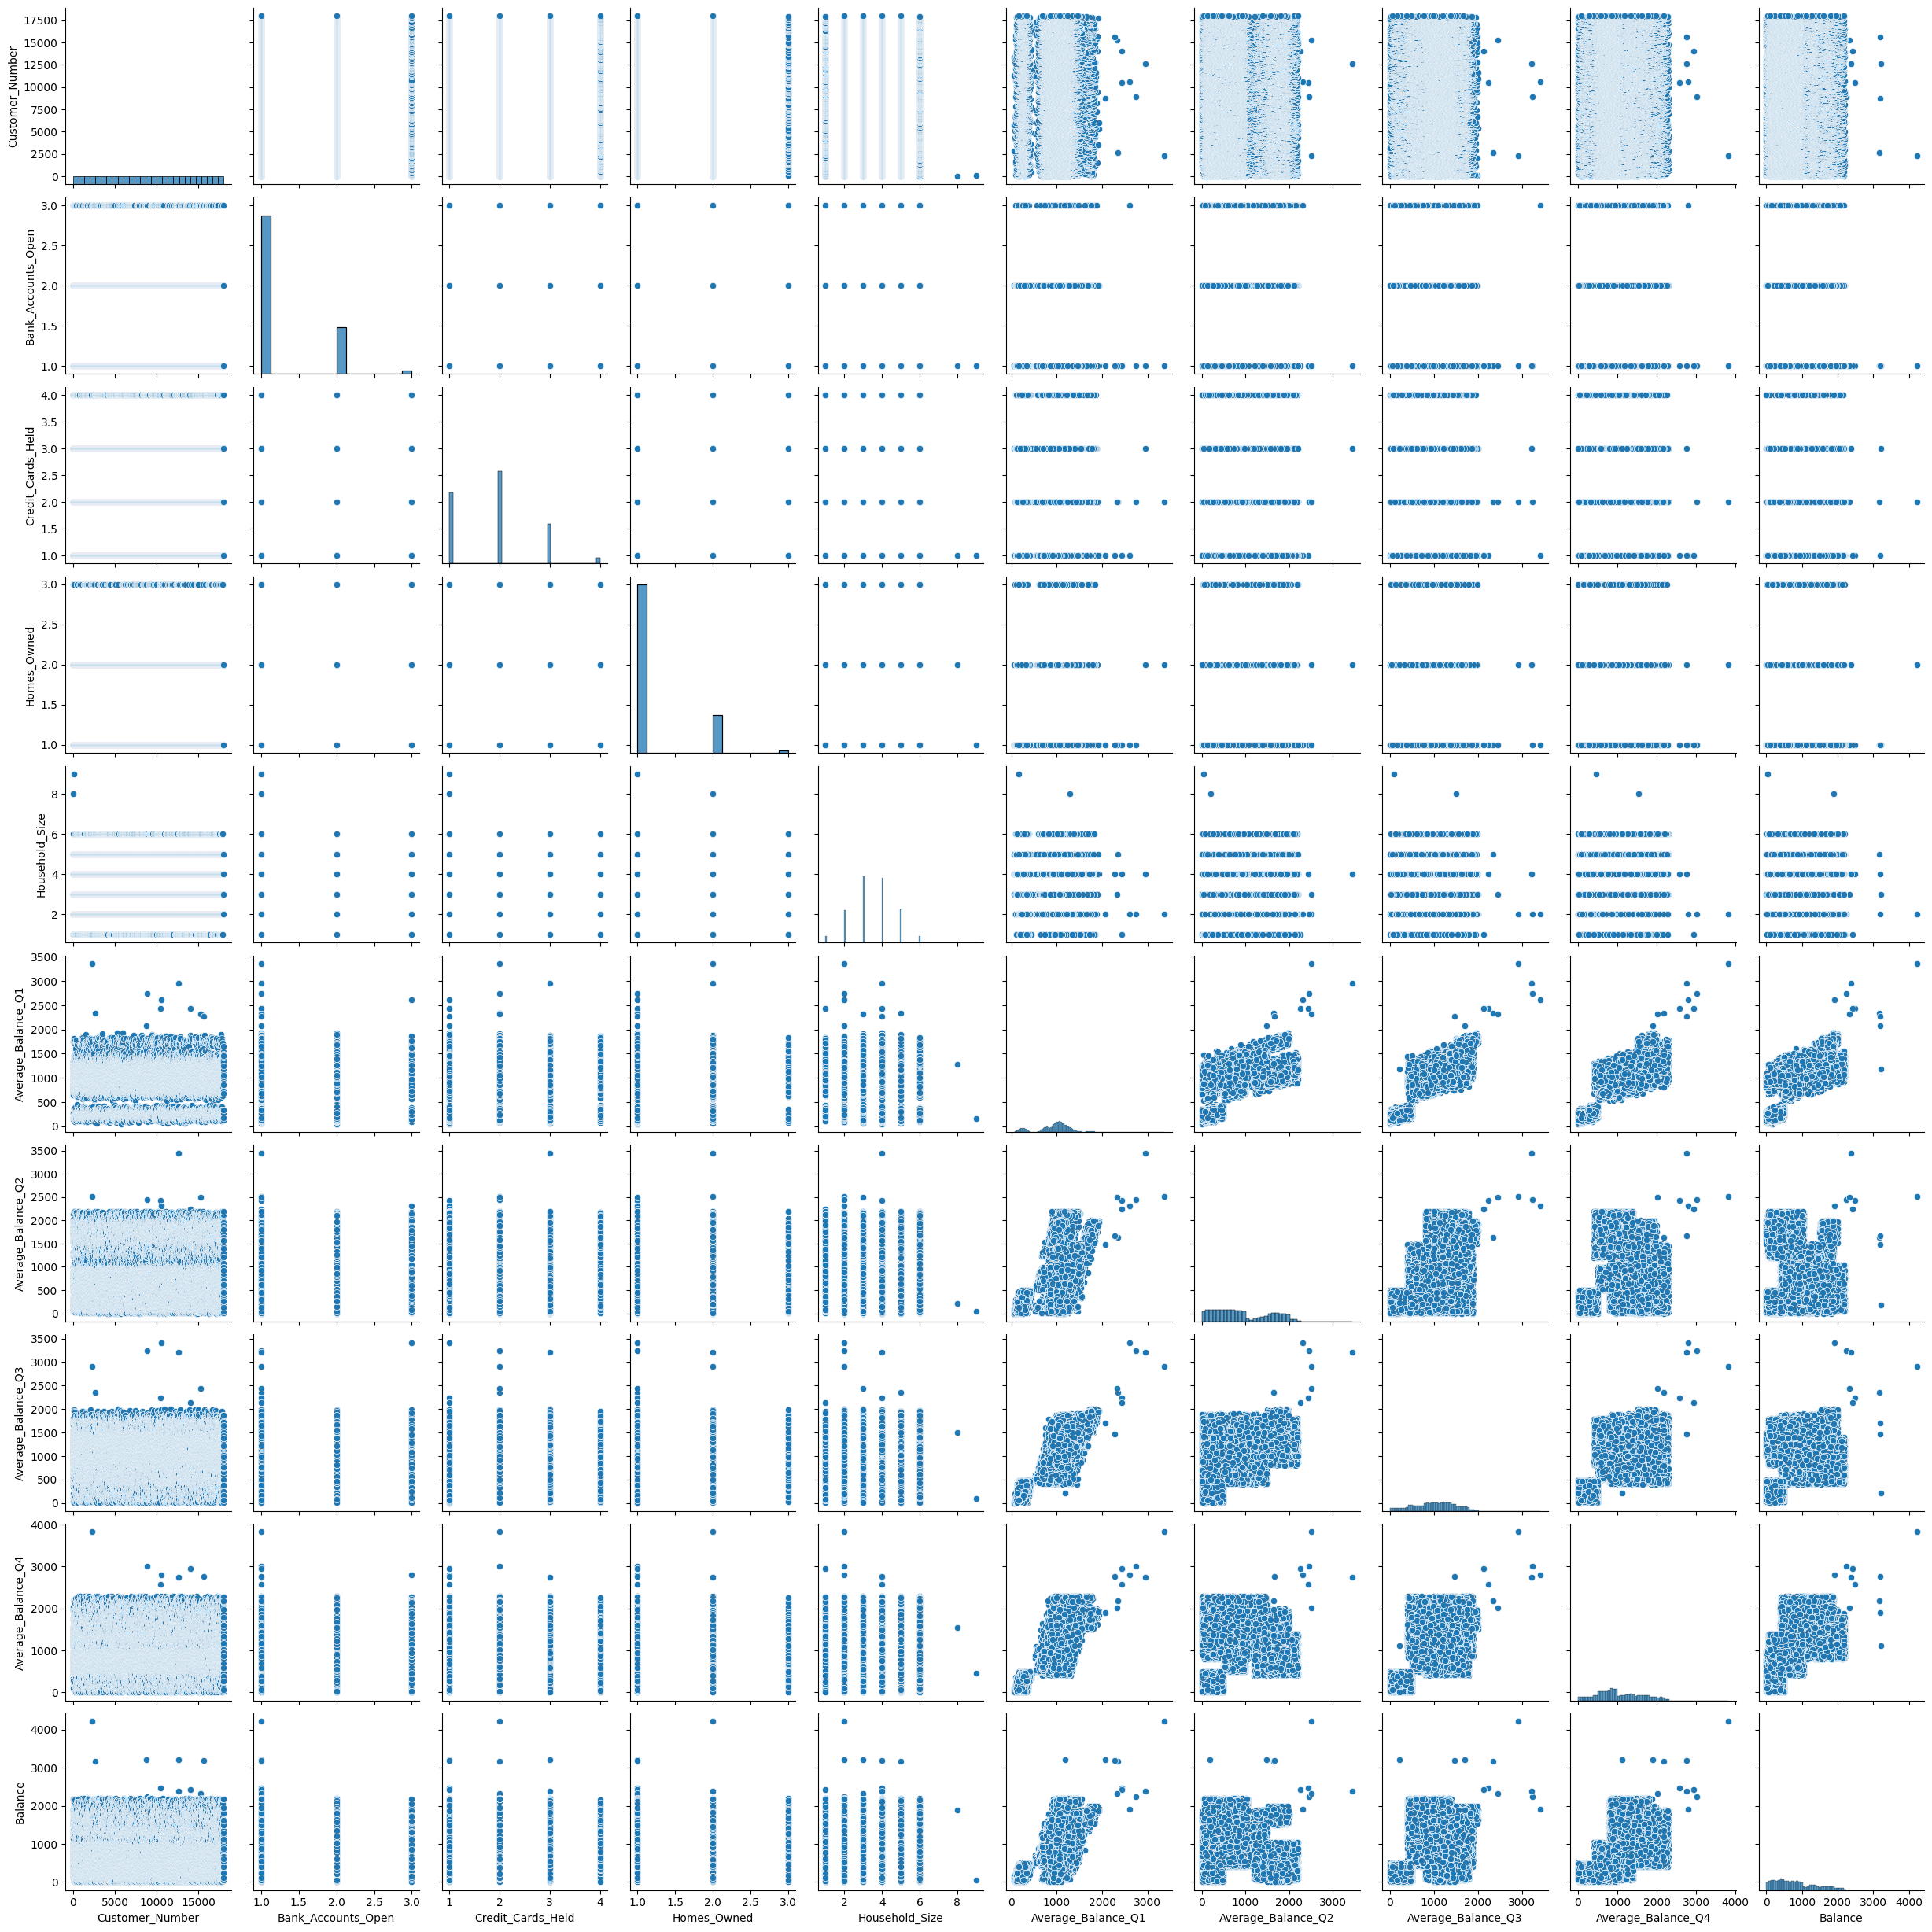

In [23]:
sns.pairplot(data=df);

# GESTIÓN DE NULOS Y OUTLIERS

Para gestionar los nulos vamos a sustituir por la mediana, usar el Iterative Imputer y el KNN Imputer para ver cual se asemeja más a los valores totales del dataframe original.

Vamos a recordar en que columnas tenemos los nulos.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_Number       18000 non-null  int64  
 1   Offer_Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer_Type           18000 non-null  object 
 4   Income_Level          18000 non-null  object 
 5   Bank_Accounts_Open    18000 non-null  int64  
 6   Overdraft_Protection  18000 non-null  object 
 7   Credit_Rating         18000 non-null  object 
 8   Credit_Cards_Held     18000 non-null  int64  
 9   Homes_Owned           18000 non-null  int64  
 10  Household_Size        18000 non-null  int64  
 11  Own_Your_Home         18000 non-null  object 
 12  Average_Balance_Q1    17976 non-null  float64
 13  Average_Balance_Q2    17976 non-null  float64
 14  Average_Balance_Q3    17976 non-null  float64
 15  Average_Balance_Q4 

Vemos que las tenemos en las columnas que tenemos separadas en "columnas_numeric"

In [25]:
numeric_mediana=columnas_numeric.copy()
numeric_iterative=columnas_numeric.copy()
numeric_knn=columnas_numeric.copy()

Ahora vamos a sustituir por la mediana

In [26]:
for col in numeric_mediana:
    mediana = numeric_mediana[col].median()
    numeric_mediana[col].fillna(mediana, inplace=True)
numeric_mediana.isnull().sum()


Average_Balance_Q1    0
Average_Balance_Q2    0
Average_Balance_Q3    0
Average_Balance_Q4    0
Balance               0
dtype: int64

Turno del Iterative Imputer

In [27]:
imputer = IterativeImputer()

imputer.fit(numeric_iterative)
imputer.transform(numeric_iterative)
# convertimos el array a un dataframe
df_numeric_iterative = pd.DataFrame(imputer.transform(numeric_iterative), columns = numeric_iterative.columns)
df_numeric_iterative.isnull().sum()

Average_Balance_Q1    0
Average_Balance_Q2    0
Average_Balance_Q3    0
Average_Balance_Q4    0
Balance               0
dtype: int64

Vamos a hacer el KNN-Imputer

In [28]:
# inciamos el KNNImputer y lo aplicamos a nuestras variables numéricas
imputerKNN = KNNImputer(n_neighbors=5)
imputerKNN.fit(numeric_knn)

# aplicamos el método a nuestras variables y lo almacenamos en una variable
numericas_knn= imputerKNN.transform(numeric_knn)

# convertimos el array a un dataframe
df_numeric_knn = pd.DataFrame(numericas_knn, columns = numeric_knn.columns)

df_numeric_knn.isnull().sum()


Average_Balance_Q1    0
Average_Balance_Q2    0
Average_Balance_Q3    0
Average_Balance_Q4    0
Balance               0
dtype: int64

Ahora vamos a comparar el original con cada uno de los métodos seleccionados para eliminar los nulos

In [29]:
print("DESCRIPCIÓN ESTADÍSTICA DF ORIGINAL:") 
columnas_numeric.describe().T


DESCRIPCIÓN ESTADÍSTICA DF ORIGINAL:


,count,mean,std,min,25%,50%,75%,max
Average_Balance_Q1,17976.0,940.515562,350.297837,48.25,787.50,1007.0,1153.25,3366.25
Average_Balance_Q2,17976.0,910.450656,620.077060,0.00,392.75,772.0,1521.00,3450.00
Average_Balance_Q3,17976.0,999.392190,457.402268,0.00,663.00,1032.0,1342.00,3421.00
Average_Balance_Q4,17976.0,1042.033600,553.452599,0.00,633.00,945.5,1463.00,3823.00
Balance,17976.0,810.185803,559.001365,0.00,363.00,703.0,1212.00,4215.00


In [30]:
print("DESCRIPCIÓN ESTADÍSTICA DF MEDIANA:") 
numeric_mediana.describe().T

DESCRIPCIÓN ESTADÍSTICA DF MEDIANA:


,count,mean,std,min,25%,50%,75%,max
Average_Balance_Q1,18000.0,940.604208,350.072621,48.25,787.9375,1007.0,1152.5625,3366.25
Average_Balance_Q2,18000.0,910.266056,619.684111,0.00,393.0000,772.0,1520.2500,3450.00
Average_Balance_Q3,18000.0,999.435667,457.098763,0.00,664.0000,1032.0,1342.0000,3421.00
Average_Balance_Q4,18000.0,1041.904889,553.094705,0.00,633.0000,945.5,1462.0000,3823.00
Balance,18000.0,810.042889,558.642246,0.00,363.7500,703.0,1211.0000,4215.00


In [31]:
print("DESCRIPCIÓN ESTADÍSTICA DF ITERATIVE IMPUTER:") 
df_numeric_iterative.describe().T

DESCRIPCIÓN ESTADÍSTICA DF ITERATIVE IMPUTER:


,count,mean,std,min,25%,50%,75%,max
Average_Balance_Q1,18000.0,940.515562,350.064214,48.25,787.9375,1006.5,1152.5625,3366.25
Average_Balance_Q2,18000.0,910.450656,619.663515,0.00,393.0000,773.0,1520.2500,3450.00
Average_Balance_Q3,18000.0,999.392190,457.097214,0.00,664.0000,1032.0,1342.0000,3421.00
Average_Balance_Q4,18000.0,1042.033600,553.083487,0.00,633.0000,946.0,1462.0000,3823.00
Balance,18000.0,810.185803,558.628553,0.00,363.7500,704.0,1211.0000,4215.00


In [32]:
print("DESCRIPCIÓN ESTADÍSTICA DF KNN-ITERATIVE:") 
df_numeric_knn.describe().T

DESCRIPCIÓN ESTADÍSTICA DF KNN-ITERATIVE:


,count,mean,std,min,25%,50%,75%,max
Average_Balance_Q1,18000.0,940.515562,350.064214,48.25,787.9375,1006.5,1152.5625,3366.25
Average_Balance_Q2,18000.0,910.450656,619.663515,0.00,393.0000,773.0,1520.2500,3450.00
Average_Balance_Q3,18000.0,999.392190,457.097214,0.00,664.0000,1032.0,1342.0000,3421.00
Average_Balance_Q4,18000.0,1042.033600,553.083487,0.00,633.0000,946.0,1462.0000,3823.00
Balance,18000.0,810.185803,558.628553,0.00,363.7500,704.0,1211.0000,4215.00


Vemos que tanto el Interative Imputer como el KNN-Iterative me devuelven los mismos valores estadísticos que el dataframe original, así que vamos a sustituir los nulos por estos valores.

In [33]:
df_sin_nulos = df.drop(["Average_Balance_Q1","Average_Balance_Q2","Average_Balance_Q3","Average_Balance_Q4","Balance"],axis=1)
df=pd.concat([df_sin_nulos, df_numeric_knn], axis=1)
df.isnull().sum()

Customer_Number         0
Offer_Accepted          0
Reward                  0
Mailer_Type             0
Income_Level            0
Bank_Accounts_Open      0
Overdraft_Protection    0
Credit_Rating           0
Credit_Cards_Held       0
Homes_Owned             0
Household_Size          0
Own_Your_Home           0
Average_Balance_Q1      0
Average_Balance_Q2      0
Average_Balance_Q3      0
Average_Balance_Q4      0
Balance                 0
dtype: int64

Ya hemos sustituido todos los nulos. Al ser un porcentaje tan pequeño no haría falta representar las gráficas de nuevo, ya que serán practicamente iguales.

Vamos a ver el porcentaje de outliers que tenemos para ver que hacemos con ellos.

In [34]:
def detectar_outliers(lista_columnas, dataframe):

    dict_indices = {}

    for i in lista_columnas:
        Q1 = np.nanpercentile(dataframe[i], 25)
        Q3 = np.nanpercentile(dataframe[i], 75)

        IQR = Q3 - Q1

        outlier_step = IQR * 1.5
        outliers_value = dataframe[(dataframe[i] < Q1 - outlier_step) | (dataframe[i] > Q3 + outlier_step)]

        if outliers_value.shape[0] > 0:
            dict_indices[i] = outliers_value.index.tolist()
        else:
            #dict_indices[i] = 'sin outliers'
            pass
    return dict_indices

In [35]:
dict_outliers = detectar_outliers(df_numeric_knn.columns, df_numeric_knn)

for key in dict_outliers.keys():
    percent_outliers = len(dict_outliers[key]) * 100 / df_numeric_knn.shape[0]
    print("{}: {:.2f}%".format(key, percent_outliers))

Average_Balance_Q1: 8.17%
Average_Balance_Q2: 0.01%
Average_Balance_Q3: 0.03%
Average_Balance_Q4: 0.03%
Balance: 0.03%


La única variable con más outliers es Average_Balance_Q1, pero de momento vamos a dejarlos, ya que la mayoría se encuentra cerca del cero y es posible que el balance promedio de cuentas en el primer quatrimestre sea bajo por las fechas.

# NORMALIZACIÓN & ESTANDARIZACIÓN

Al ser la VR categórica no podremos normalizarla nunca así que pasamos directamente a la estandarización para dejar todas las variables numéricas con la misma métrica

Tenemos dos maneras posibles de hacerlo:

- StandardScaler escala los datos para que tengan una media de 0 y una desviación estándar de 1. Esta técnica es útil cuando las características siguen una distribución normal o gaussiana y cuando no hay valores atípicos en los datos.

- RobustScaler, por otro lado, es más resistente a los valores atípicos en los datos. Escala los datos utilizando estadísticas robustas a los valores atípicos, como la mediana y los cuartiles, en lugar de la media y la desviación estándar. Como resultado, RobustScaler puede manejar mejor los datos que contienen valores extremos y puede proporcionar mejores resultados en modelos que son sensibles a los valores atípicos.

En este dataframe tenemos valores atípicos, por lo que RobustScaler es una mejor opción para escalar las características.

Primero vamos a extraer de nuevo las columnas numéricas del nuevo dataframe que no contiene nulos, excluyendo de nuevo las variables discretas


In [36]:
df_numeric = df.select_dtypes(include = np.number)
df_numeric.drop(['Customer_Number',"Bank_Accounts_Open","Credit_Cards_Held","Homes_Owned","Household_Size"], axis=1, inplace=True)
columnas_numeric=df_numeric.columns
columnas_numeric



Index(['Average_Balance_Q1', 'Average_Balance_Q2', 'Average_Balance_Q3',
       'Average_Balance_Q4', 'Balance'],
      dtype='object')

In [37]:
# construir el modelo de escalador
robust = RobustScaler()

# ajustamos el modelo utilizando nuestro set de datos
robust.fit(df[columnas_numeric])

# transformamos los datos
X_robust = robust.transform(df[columnas_numeric])

df_estandarizado= df.copy()
# por último convertiremos el array que nos devuelve en un dataframe. 

df_estandarizado[columnas_numeric] = X_robust
df_estandarizado.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,0.423037,0.794855,-0.228614,0.179735,0.351726
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,-2.356531,-0.651142,-1.365782,-1.047045,-0.398938
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,-2.002057,-0.360169,-1.002950,-0.966224,-0.545294
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,0.582791,0.714127,1.073746,0.208685,-0.336382
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,0.560850,1.212686,0.479351,0.043426,-0.400118


# ENCODING

Una vez que tenemos la estandarización hecha pasamos al encoding de las variables categóricas. Primero haremos otra visualización para recordar el orden de las variables discretas.

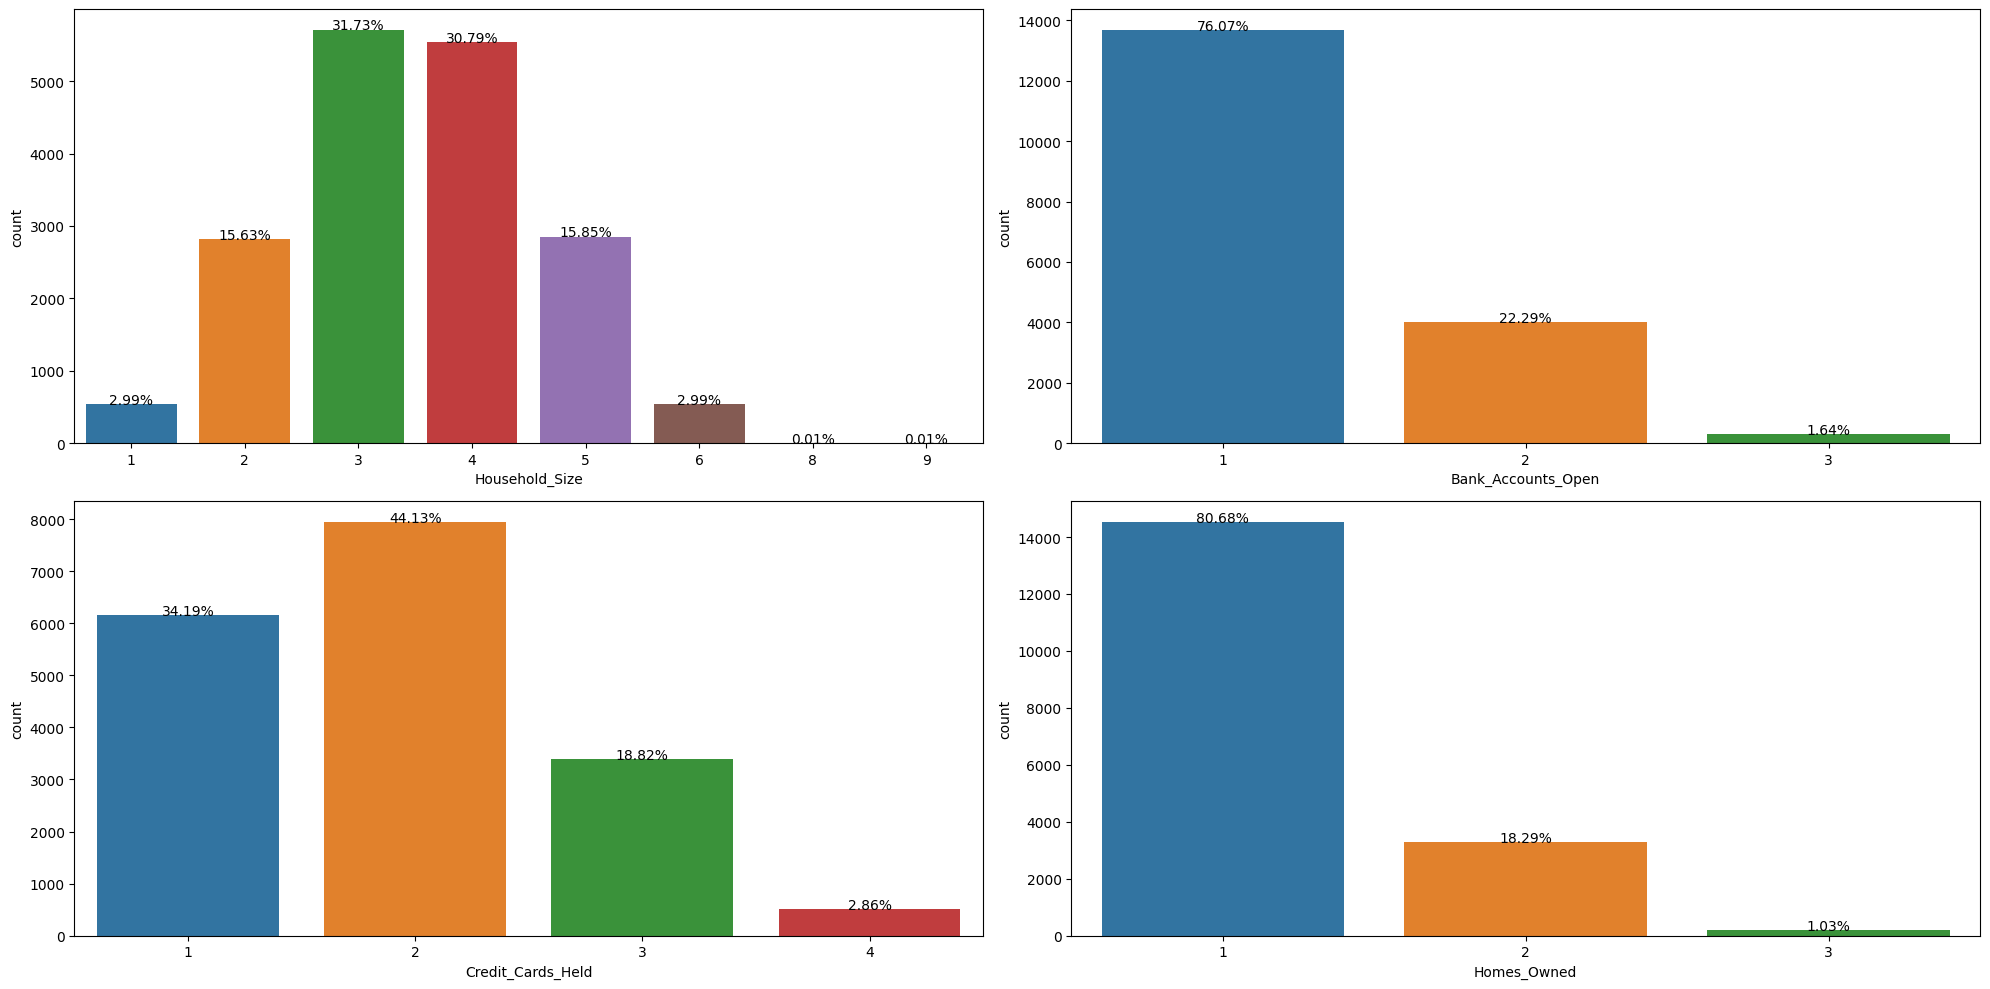

In [38]:
# Gráfico de distribución para cada variable numérica discreta

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

axes = axes.flat

columnas_disc= df[['Household_Size', 'Bank_Accounts_Open', 'Credit_Cards_Held', 'Homes_Owned']].columns

for i, colum in enumerate(columnas_disc):
    chart = sns.countplot(
                x = df[colum], 
                ax = axes[i])
    total = float(len(df[colum]))
    for p in chart.patches:
        height = p.get_height()
        chart.text(p.get_x() + p.get_width() / 2., height + 3,
                '{:.2f}%'.format((height / total) * 100),
                ha='center')

fig.tight_layout();

El encoding hay que hacerlo columna a columa así que vamos creando el orden para cada una.

In [39]:
df_disc=df[columnas_disc]
df_disc.head()

,Household_Size,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned
0,4,1,2,1
1,5,1,2,2
2,2,2,2,1
3,4,2,1,1
4,6,1,2,1


In [40]:
print("House Hold Valores únicos:", df_disc.Household_Size.unique())
print("Bank Accounts Valores únicos:", df_disc.Bank_Accounts_Open.unique())
print("Credit Cards Held Valores únicos:", df_disc.Credit_Cards_Held.unique())
print("Homes Owned Valores únicos:", df_disc.Homes_Owned.unique())

House Hold Valores únicos: [4 5 2 6 3 1 8 9]
Bank Accounts Valores únicos: [1 2 3]
Credit Cards Held Valores únicos: [2 1 3 4]
Homes Owned Valores únicos: [1 2 3]


Hay que convertir los valores a string para poder hacer el encoding

In [41]:
for col in df_disc.columns:
    df_disc[col] = df_disc[col].astype(str)

df_disc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Household_Size      18000 non-null  object
 1   Bank_Accounts_Open  18000 non-null  object
 2   Credit_Cards_Held   18000 non-null  object
 3   Homes_Owned         18000 non-null  object
dtypes: object(4)
memory usage: 562.6+ KB


In [42]:
# establecemos el orden que queremos. 
orden_household = ['9', '8', '6', '1', '2', '5', '4', '3']
orden_bankacc = ['3', '2', '1']
orden_creditcards = ['4', '3', '1', '2']
orden_homesowned = ['3', '2', '1']

In [43]:
# Definir lista de variables y sus respectivos ordenamientos
variables_ordinales = ["Household_Size", "Bank_Accounts_Open", "Credit_Cards_Held", "Homes_Owned"]
ordenes_variables = [orden_household, orden_bankacc, orden_creditcards, orden_homesowned]

# Crear un objeto OrdinalEncoder para cada variable
encoders = []
for orden in ordenes_variables:
    encoder = OrdinalEncoder(categories=[orden], dtype=int)
    encoders.append(encoder)

# Transformar las variables usando los encoders
transformados_oe = pd.DataFrame()
for i, var in enumerate(df_disc):
    transformed_var = encoders[i].fit_transform(df_disc[[var]])
    transformed_var = pd.DataFrame(transformed_var, columns=[var])
    transformados_oe = pd.concat([transformados_oe, transformed_var], axis=1)

# Mostrar DataFrame resultante
transformados_oe.head()


,Household_Size,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned
0,6,2,3,2
1,5,2,3,1
2,4,1,3,2
3,6,1,2,2
4,2,2,3,2


In [44]:
transformados_oe = transformados_oe.rename(columns={'Household_Size': 'Household_Size_encoded',
                                  'Bank_Accounts_Open': 'Bank_Accounts_Open_encoded',
                                  'Credit_Cards_Held': 'Credit_Cards_Held_encoded',
                                  'Homes_Owned': 'Homes_Owned_encoded'})

transformados_oe.head()

,Household_Size_encoded,Bank_Accounts_Open_encoded,Credit_Cards_Held_encoded,Homes_Owned_encoded
0,6,2,3,2
1,5,2,3,1
2,4,1,3,2
3,6,1,2,2
4,2,2,3,2


Juntamos los datos encoded a nuestro dataframe

In [45]:
df=pd.concat([df_estandarizado, transformados_oe], axis=1)
df.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,...,Own_Your_Home,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance,Household_Size_encoded,Bank_Accounts_Open_encoded,Credit_Cards_Held_encoded,Homes_Owned_encoded
0,1,No,Air Miles,Letter,High,1,No,High,2,1,...,No,0.423037,0.794855,-0.228614,0.179735,0.351726,6,2,3,2
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,...,Yes,-2.356531,-0.651142,-1.365782,-1.047045,-0.398938,5,2,3,1
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,...,Yes,-2.002057,-0.360169,-1.002950,-0.966224,-0.545294,4,1,3,2
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,...,No,0.582791,0.714127,1.073746,0.208685,-0.336382,6,1,2,2
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,...,Yes,0.560850,1.212686,0.479351,0.043426,-0.400118,2,2,3,2


Ahora hacemos los mismo para las categóricas. Primero visualizamos.

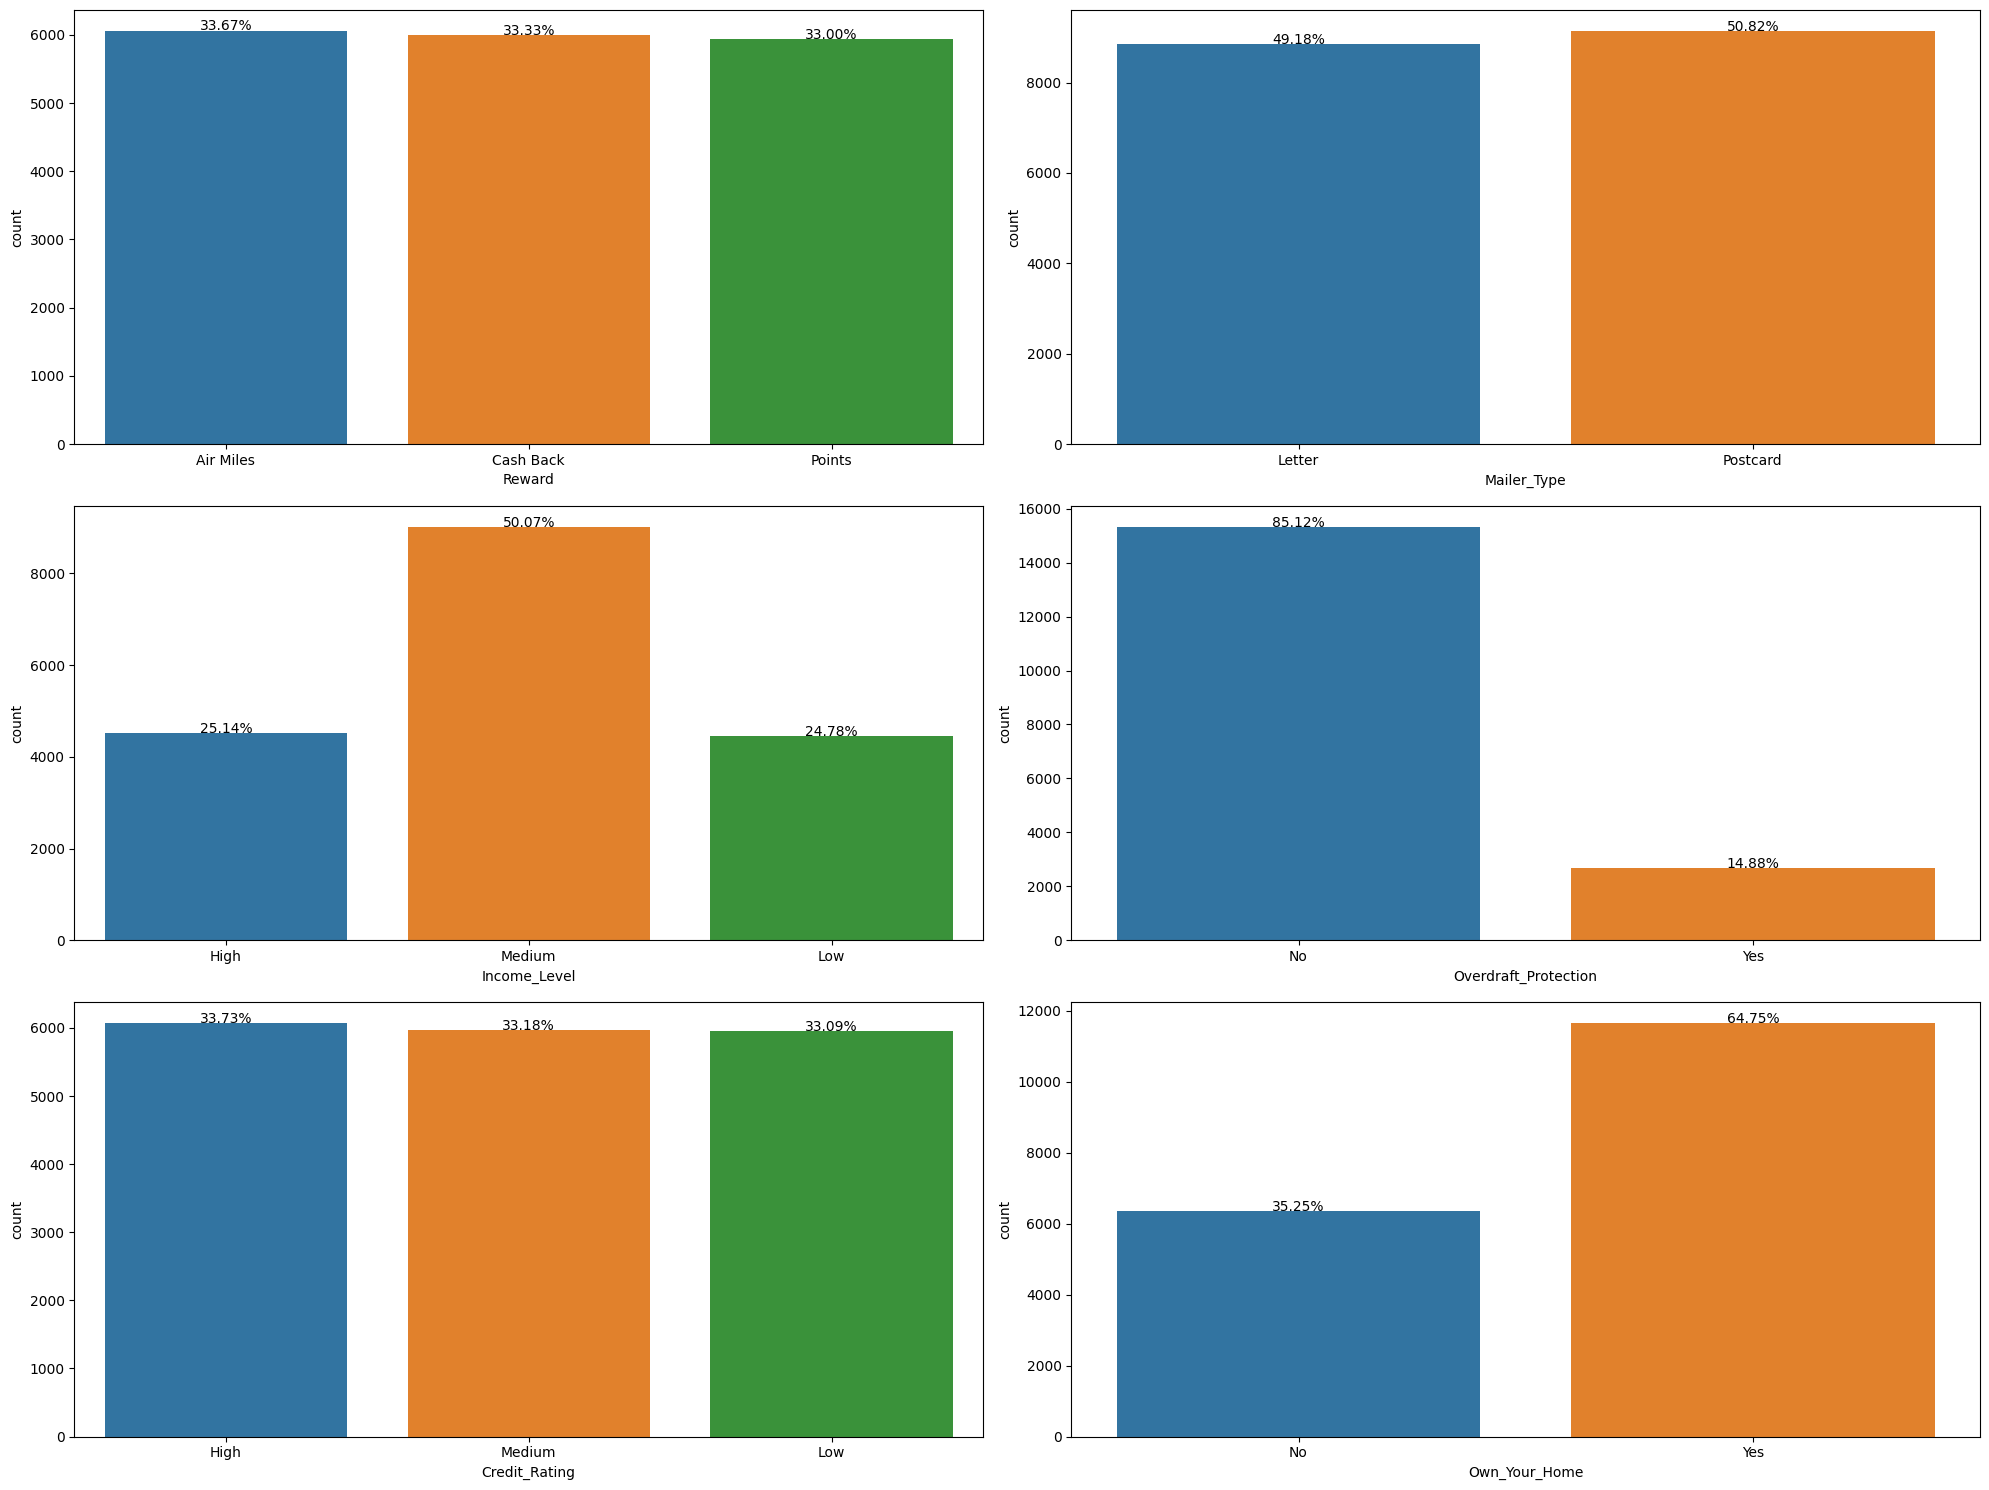

In [46]:
# Gráfico de distribución para cada variable numérica discreta

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 15))

axes = axes.flat

for i, colum in enumerate(columnas_no_numeric):
    chart = sns.countplot(
                x = df[colum], 
                ax = axes[i])
    total = float(len(df[colum]))
    for p in chart.patches:
        height = p.get_height()
        chart.text(p.get_x() + p.get_width() / 2., height + 3,
                '{:.2f}%'.format((height / total) * 100),
                ha='center')

fig.tight_layout();

Categóricas con orden van a ser:
- Income_Level
- Overdraft_Protection
- Own_Your_Home

Vamos a seguir los mismos pasos de antes

In [47]:
df_categoricas=df[["Offer_Accepted","Income_Level","Overdraft_Protection","Own_Your_Home"]]


In [48]:
print("Income_Level Valores únicos:", df_categoricas.Income_Level.unique())
print("Overdraft_Protection Valores únicos:", df_categoricas.Overdraft_Protection.unique())
print("Own_Your_Home Valores únicos:", df_categoricas.Own_Your_Home.unique())

Income_Level Valores únicos: ['High' 'Medium' 'Low']
Overdraft_Protection Valores únicos: ['No' 'Yes']
Own_Your_Home Valores únicos: ['No' 'Yes']


In [49]:
# establecemos el orden que queremos. 
orden_offeraccepted = ["Yes","No"]
orden_incomelevel = ['Low', 'High', 'Medium']
orden_overdraft = ['Yes', 'No']
orden_ownyourhome = ['No', 'Yes']

In [50]:
# Definir lista de variables y sus respectivos ordenamientos
variables_ordinales2 = ["Offer_Accepted","Income_Level", "Overdraft_Protection", "Own_Your_Home"]
ordenes_variables2 = [orden_offeraccepted,orden_incomelevel, orden_overdraft, orden_ownyourhome]

# Crear un objeto OrdinalEncoder para cada variable
encoders = []
for orden in ordenes_variables2:
    encoder = OrdinalEncoder(categories=[orden], dtype=int)
    encoders.append(encoder)

# Transformar las variables usando los encoders
transformados_oe2 = pd.DataFrame()
for i, var in enumerate(df_categoricas):
    transformed_var = encoders[i].fit_transform(df_categoricas[[var]])
    transformed_var = pd.DataFrame(transformed_var, columns=[var])
    transformados_oe2 = pd.concat([transformados_oe2, transformed_var], axis=1)

# Mostrar DataFrame resultante
transformados_oe2.head()


,Offer_Accepted,Income_Level,Overdraft_Protection,Own_Your_Home
0,1,1,1,0
1,1,2,1,1
2,1,1,1,1
3,1,2,1,0
4,1,2,1,1


In [51]:
transformados_oe2 = transformados_oe2.rename(columns={'Offer_Accepted': 'Offer_Accepted_encoded', 'Income_Level': 'Income_Level_encoded',
                                  'Overdraft_Protection': 'Overdraft_Protection_encoded',
                                  'Own_Your_Home': 'Own_Your_Home_encoded'})

transformados_oe2.head()

,Offer_Accepted_encoded,Income_Level_encoded,Overdraft_Protection_encoded,Own_Your_Home_encoded
0,1,1,1,0
1,1,2,1,1
2,1,1,1,1
3,1,2,1,0
4,1,2,1,1


In [52]:
df=pd.concat([df, transformados_oe2], axis=1)
df.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,...,Average_Balance_Q4,Balance,Household_Size_encoded,Bank_Accounts_Open_encoded,Credit_Cards_Held_encoded,Homes_Owned_encoded,Offer_Accepted_encoded,Income_Level_encoded,Overdraft_Protection_encoded,Own_Your_Home_encoded
0,1,No,Air Miles,Letter,High,1,No,High,2,1,...,0.179735,0.351726,6,2,3,2,1,1,1,0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,...,-1.047045,-0.398938,5,2,3,1,1,2,1,1
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,...,-0.966224,-0.545294,4,1,3,2,1,1,1,1
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,...,0.208685,-0.336382,6,1,2,2,1,2,1,0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,...,0.043426,-0.400118,2,2,3,2,1,2,1,1


Por último haremos las que no guardan orden usando label encoder

In [53]:
# iniciamos el método

le = LabelEncoder()

In [54]:
# lo aplicamos a todo nuestro dataframe 

for col in df [["Reward", "Mailer_Type", "Credit_Rating"]].columns:
    nuevo_nombre = col + "_encoded"
    df[nuevo_nombre] = le.fit_transform(df[col])
df.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,...,Bank_Accounts_Open_encoded,Credit_Cards_Held_encoded,Homes_Owned_encoded,Offer_Accepted_encoded,Income_Level_encoded,Overdraft_Protection_encoded,Own_Your_Home_encoded,Reward_encoded,Mailer_Type_encoded,Credit_Rating_encoded
0,1,No,Air Miles,Letter,High,1,No,High,2,1,...,2,3,2,1,1,1,0,0,0,0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,...,2,3,1,1,2,1,1,0,0,2
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,...,1,3,2,1,1,1,1,0,1,2
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,...,1,2,2,1,2,1,0,0,0,0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,...,2,3,2,1,2,1,1,0,0,2


# Balance

Voy a ver el numero de datos que tengo en la VR

In [55]:
df["Offer_Accepted"].value_counts()

No     16977
Yes     1023
Name: Offer_Accepted, dtype: int64

Haciendo un downsampling creo que me quedaría con muy pocos datos pero vamos a hacer el modelo con cada una de posibilidades y comparar las métricas

Primero voy a crearme un dataframe con las columnas que tienen que ser balanceadas

In [56]:
df.columns

Index(['Customer_Number', 'Offer_Accepted', 'Reward', 'Mailer_Type',
       'Income_Level', 'Bank_Accounts_Open', 'Overdraft_Protection',
       'Credit_Rating', 'Credit_Cards_Held', 'Homes_Owned', 'Household_Size',
       'Own_Your_Home', 'Average_Balance_Q1', 'Average_Balance_Q2',
       'Average_Balance_Q3', 'Average_Balance_Q4', 'Balance',
       'Household_Size_encoded', 'Bank_Accounts_Open_encoded',
       'Credit_Cards_Held_encoded', 'Homes_Owned_encoded',
       'Offer_Accepted_encoded', 'Income_Level_encoded',
       'Overdraft_Protection_encoded', 'Own_Your_Home_encoded',
       'Reward_encoded', 'Mailer_Type_encoded', 'Credit_Rating_encoded'],
      dtype='object')

In [57]:
df_encoded=df[["Offer_Accepted_encoded","Household_Size_encoded","Bank_Accounts_Open_encoded","Credit_Cards_Held_encoded","Homes_Owned_encoded","Income_Level_encoded","Overdraft_Protection_encoded","Own_Your_Home_encoded","Reward_encoded","Mailer_Type_encoded","Credit_Rating_encoded"]]
df_encoded

,Offer_Accepted_encoded,Household_Size_encoded,Bank_Accounts_Open_encoded,Credit_Cards_Held_encoded,Homes_Owned_encoded,Income_Level_encoded,Overdraft_Protection_encoded,Own_Your_Home_encoded,Reward_encoded,Mailer_Type_encoded,Credit_Rating_encoded
0,1,6,2,3,2,1,1,0,0,0,0
1,1,5,2,3,1,2,1,1,0,0,2
2,1,4,1,3,2,1,1,1,0,1,2
3,1,6,1,2,2,2,1,0,0,0,0
4,1,2,2,3,2,2,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
17995,1,5,2,2,2,1,1,1,1,0,1
17996,1,7,2,1,2,1,1,1,1,0,1
17997,1,6,2,3,2,1,1,0,1,0,1
17998,1,4,2,0,1,2,1,1,1,0,2


Vamos a crear una función para poder hacer downsampling y upsampling

In [58]:
def balanceo(df, variable, input):
    # Separamos en x e y
    x = df.drop(variable, axis=1)
    y = df[variable]
    
    # Chequea si el input es válido
    if input not in ['downsampling', 'upsampling']:
        print("Invalid input")
        return None
    
    # Selecciona el método según el imput
    if input == 'downsampling':
        sampler = RandomUnderSampler()
    else:
        sampler = RandomOverSampler()
        
    # Aplica el método 
    x_resampled, y_resampled = sampler.fit_resample(x, y)
    
    
    return x_resampled, y_resampled

Empezamos con upsampling:

In [59]:
xu, yu = balanceo(df_encoded, 'Offer_Accepted_encoded', 'upsampling')
yu.value_counts()

1    16977
0    16977
Name: Offer_Accepted_encoded, dtype: int64

In [60]:
df_upp = pd.concat([xu, yu], axis = 1)
df_upp.head(2)

,Household_Size_encoded,Bank_Accounts_Open_encoded,Credit_Cards_Held_encoded,Homes_Owned_encoded,Income_Level_encoded,Overdraft_Protection_encoded,Own_Your_Home_encoded,Reward_encoded,Mailer_Type_encoded,Credit_Rating_encoded,Offer_Accepted_encoded
0,6,2,3,2,1,1,0,0,0,0,1
1,5,2,3,1,2,1,1,0,0,2,1


Y ahora downsampling:

In [61]:
xd, yd = balanceo(df_encoded, 'Offer_Accepted_encoded', 'downsampling')
yd.value_counts()

0    1023
1    1023
Name: Offer_Accepted_encoded, dtype: int64

In [62]:
df_down = pd.concat([xd, yd], axis = 1)
df_down.head(2)

,Household_Size_encoded,Bank_Accounts_Open_encoded,Credit_Cards_Held_encoded,Homes_Owned_encoded,Income_Level_encoded,Overdraft_Protection_encoded,Own_Your_Home_encoded,Reward_encoded,Mailer_Type_encoded,Credit_Rating_encoded,Offer_Accepted_encoded
0,4,2,2,2,2,1,0,0,0,1,0
1,5,2,3,2,1,0,1,0,1,1,0


# AJUSTE DE MODELO

In [63]:
# Reparto de datos en train y test. lo primero que hacemos es definir cual es nuestra variable Y y nuestras variables X

xu = df_upp.drop(["Offer_Accepted_encoded"], axis = 1)
yu = df_upp["Offer_Accepted_encoded"]

xu_train, xu_test, yu_train, yu_test = train_test_split(xu, yu, train_size   = 0.8, random_state = 42)

In [64]:
yu_test.value_counts()

0    3417
1    3374
Name: Offer_Accepted_encoded, dtype: int64

In [65]:
yu_train.value_counts()

1    13603
0    13560
Name: Offer_Accepted_encoded, dtype: int64

In [66]:
# Probamos con el down también
# ==============================================================================

xd = df_down.drop(["Offer_Accepted_encoded"], axis = 1)
yd = df_down["Offer_Accepted_encoded"]

xd_train, xd_test, yd_train, yd_test = train_test_split(xd, yd, train_size   = 0.8, random_state = 42)

In [67]:
yd_test.value_counts()

0    206
1    204
Name: Offer_Accepted_encoded, dtype: int64

In [68]:
yd_train.value_counts()

1    819
0    817
Name: Offer_Accepted_encoded, dtype: int64

In [69]:
# Iniciamos el método de Linear Regression. Ajustamos el modelo con .fit() donde le tendremos que pasar las variables predictoras y la respuesta

lr = LogisticRegression()
lr.fit(xu_train, yu_train)

LogisticRegression()

In [70]:
# Hacemos las predicciones sobre los dos set de datos el X_test y el X_train

yu_pred_test = lr.predict(xu_test)
yu_pred_train = lr.predict(xu_train)

In [71]:
# Vemos las diferencias entre el Real y el Predicho

train_upp_df = pd.DataFrame({'Real': yu_train, 'Predicted': yu_pred_train, 'Set': ['Train']*len(yu_train)})
test_upp_df  = pd.DataFrame({'Real': yu_test,  'Predicted': yu_pred_test,  'Set': ['Test']*len(yu_test)})
results_upp = pd.concat([train_upp_df,test_upp_df], axis = 0)
results_upp

,Real,Predicted,Set
17426,1,1,Train
21415,0,0,Train
24789,0,0,Train
985,1,1,Train
13243,1,0,Train
...,...,...,...
21818,0,0,Test
27119,0,1,Test
964,1,0,Test
9477,1,1,Test


In [72]:
# Definimos la matriz de confusión

def matriz_confusion(clases_reales, clases_predichas, total_filas_test):
    mat_lr = confusion_matrix(clases_reales, clases_predichas)
    df = pd.DataFrame(mat_lr, columns = ["Offer No", "Offer Accepted"], index = ["No Offer", "Offer"])
    return df

In [73]:
# Aplicamos la matriz de confusion 

matriz_logistica = matriz_confusion(yu_test, yu_pred_test, yu_test.shape[0])
matriz_logistica

,Offer No,Offer Accepted
No Offer,2159,1258
Offer,1338,2036


In [74]:
# Generamos una función para sacar todas las variables para medir la eficacia de nuestro modelo


def metricas(real_test, pred_test, real_train, pred_train, modelo):
    
    # Test
    accuracy_test = accuracy_score(real_test, pred_test)
    precision_test = precision_score(real_test, pred_test)
    recall_test = recall_score(real_test, pred_test)
    f1_test = f1_score(real_test, pred_test)
    kappa_test = cohen_kappa_score(real_test, pred_test)

    # Train
    accuracy_train = accuracy_score(real_train, pred_train)
    precision_train = precision_score(real_train, pred_train)
    recall_train = recall_score(real_train, pred_train)
    f1_train = f1_score(real_train, pred_train)
    kappa_train = cohen_kappa_score(real_train, pred_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kappa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [75]:
# Comprobamos los resultados de nuestro modelo

rl_result_upp = metricas(yu_test, yu_pred_test, yu_train, yu_pred_train, "Regresión logistica")
rl_result_upp

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.617729,0.618094,0.603438,0.610678,0.235314,test,Regresión logistica
1,0.616942,0.620606,0.604867,0.612635,0.233913,train,Regresión logistica


In [76]:
lr = LogisticRegression()
lr.fit(xd_train, yd_train)

LogisticRegression()

In [77]:
# Hacemos las predicciones sobre los dos set de datos el X_test y el X_train

yd_pred_test = lr.predict(xd_test)
yd_pred_train = lr.predict(xd_train)

In [78]:
# Vemos las diferencias entre el Real y el Predicho

train_down_df = pd.DataFrame({'Real': yd_train, 'Predicted': yd_pred_train, 'Set': ['Train']*len(yd_train)})
test_down_df  = pd.DataFrame({'Real': yd_test,  'Predicted': yd_pred_test,  'Set': ['Test']*len(yd_test)})
results_down = pd.concat([train_down_df,test_down_df], axis = 0)
results_down

,Real,Predicted,Set
507,0,0,Train
986,0,0,Train
1386,1,0,Train
1872,1,1,Train
1564,1,1,Train
...,...,...,...
567,0,0,Test
922,0,0,Test
1859,1,1,Test
1669,1,0,Test


In [79]:
# Comparamos resultados

rl_result_down = metricas(yd_test, yd_pred_test, yd_train, yd_pred_train, "Regresión logistica")
rl_result_down

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.617073,0.621762,0.588235,0.604534,0.233928,test,Regresión logistica
1,0.616137,0.623545,0.588523,0.605528,0.232325,train,Regresión logistica


In [80]:
rl_result_upp


,accuracy,precision,recall,f1,kappa,set,modelo
0,0.617729,0.618094,0.603438,0.610678,0.235314,test,Regresión logistica
1,0.616942,0.620606,0.604867,0.612635,0.233913,train,Regresión logistica


Sin ser ninguno de los dos modelos especialmente bueno, está claro que el que ha usado upsampling ha obtenido mejores resultados.

# DECISSION TREE

In [81]:
# Iniciamos el método de Decission Tree. Ajustamos el modelo con .fit() donde le tendremos que pasar las variables predictoras y la respuesta

arbol = DecisionTreeClassifier()
arbol.fit(xu_train, yu_train)

DecisionTreeClassifier()

In [82]:
# Hacemos las predicciones sobre los dos set de datos el X_test y el X_train

yu_pred_train_dt = arbol.predict(xu_train)
yu_pred_test_dt = arbol.predict(xu_test)

In [83]:
# Comprobamos los resultados de nuestro modelo

dt_result = metricas(yu_test, yu_pred_test_dt,yu_train, yu_pred_train_dt, "Decission Tree I" )
dt_result

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.882786,0.978116,0.781565,0.868863,0.765266,test,Decission Tree I
1,0.905975,0.983968,0.825700,0.897914,0.811998,train,Decission Tree I


In [84]:
# Comprobamos los features max y la profundidad de nuestro arbol

max_features = np.sqrt(len(xu_train.columns)) #MAX features
max_features, (arbol.tree_.max_depth)

(3.1622776601683795, 19)

In [85]:
# Establecemos los parámetros de nuestro arbol

param = {"max_depth": [1, 5, 10, 15, 19],
         "min_samples_split": [10, 50, 100],
         "max_features": [1,2,3],
         "min_samples_leaf": [10, 50, 100]}
arbol2 = GridSearchCV(
        estimator = DecisionTreeClassifier(), 
        param_grid = param, 
        n_jobs=-1,
        verbose = 1, 
        cv = 10, 
        return_train_score = True, 
        scoring = "neg_mean_squared_error")

In [86]:
# Entrenamos el arbol y ajustamos el modelo con los parámetros de antes

arbol2.fit(xu_train, yu_train)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 15, 19],
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [87]:
# Sacamos los mejores parámetros para obtener el mejor resultado posible

arbol2.best_params_

{'max_depth': 15,
 'max_features': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [88]:
# Aplicamos los mejores parametros

arbol3 = DecisionTreeClassifier(max_depth= 19,
 max_features= 3,
 min_samples_leaf= 10,
 min_samples_split= 10)
arbol3.fit(xu_train,yu_train)

DecisionTreeClassifier(max_depth=19, max_features=3, min_samples_leaf=10,
                       min_samples_split=10)

In [89]:
# Comparamos resultados

yu_pred_arbol_test= arbol3.predict(xu_test)
yu_pred_arbol_train= arbol3.predict(xu_train)

dt_result2 =  metricas(yu_test, yu_pred_arbol_test, yu_train, yu_pred_arbol_train, "Decission Tree II")

dt_all = pd.concat([dt_result, dt_result2, rl_result_upp], axis = 0)
dt_all

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.882786,0.978116,0.781565,0.868863,0.765266,test,Decission Tree I
1,0.905975,0.983968,0.825700,0.897914,0.811998,train,Decission Tree I
0,0.765572,0.853291,0.637819,0.729986,0.530379,test,Decission Tree II
1,0.788389,0.882835,0.665809,0.759115,0.576941,train,Decission Tree II
0,0.617729,0.618094,0.603438,0.610678,0.235314,test,Regresión logistica
1,0.616942,0.620606,0.604867,0.612635,0.233913,train,Regresión logistica


De momento parece que Decission Tree I está teniendo mejores métricas.

# RANDOM FOREST

In [90]:
# Iniciamos el método de Random Forest. Ajustamos el modelo con .fit() donde le tendremos que pasar las variables predictoras y la respuesta

bosque = GridSearchCV(
        estimator = RandomForestClassifier(), 
        param_grid = param, 
        n_jobs=-1,
        verbose = 1, 
        cv = 10)
bosque.fit(xu_train, yu_train)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 15, 19],
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=1)

In [91]:
# Sacamos los mejores parámetros para obtener el mejor resultado posible

bosque.best_params_

{'max_depth': 19,
 'max_features': 1,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [92]:
# Aplicamos los mejores parametros

rfc=RandomForestClassifier(max_depth= 19,
 max_features= 1,
 min_samples_leaf= 10,
 min_samples_split= 10)
rfc.fit(xu_train,yu_train)

RandomForestClassifier(max_depth=19, max_features=1, min_samples_leaf=10,
                       min_samples_split=10)

In [93]:
# Comparamos resultados

yu_pred_rfc_test= rfc.predict(xu_test)
yu_pred_rfc_train= rfc.predict(xu_train)

rf_result = metricas(yu_test, yu_pred_rfc_test, yu_train, yu_pred_rfc_train, "Random Forest")
df_almost = pd.concat([dt_all, rf_result], axis = 0)
df_almost

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.882786,0.978116,0.781565,0.868863,0.765266,test,Decission Tree I
1,0.905975,0.983968,0.825700,0.897914,0.811998,train,Decission Tree I
0,0.765572,0.853291,0.637819,0.729986,0.530379,test,Decission Tree II
1,0.788389,0.882835,0.665809,0.759115,0.576941,train,Decission Tree II
0,0.617729,0.618094,0.603438,0.610678,0.235314,test,Regresión logistica
1,0.616942,0.620606,0.604867,0.612635,0.233913,train,Regresión logistica
0,0.815638,0.868659,0.740960,0.799744,0.630921,test,Random Forest
1,0.835769,0.893645,0.762846,0.823081,0.671614,train,Random Forest


# GRADIENT

In [94]:
# Iniciamos el método de Gradient Boosting. Ajustamos el modelo con .fit() donde le tendremos que pasar las variables predictoras y la respuesta

grid = GridSearchCV(
        estimator  = GradientBoostingClassifier(),
        param_grid = param,
        n_jobs     = -1,
        verbose    = 1,
        cv         = 10, 
        return_train_score = True
       )

grid.fit(X = xu_train, y = yu_train)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 15, 19],
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, verbose=1)

In [95]:
# Sacamos los mejores parámetros para obtener el mejor resultado posible

grid.best_params_

{'max_depth': 19,
 'max_features': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [96]:
# Aplicamos los mejores parametros

gbc = GradientBoostingClassifier(max_depth= 15,
 max_features= 3,
 min_samples_leaf= 10,
 min_samples_split= 10)
gbc.fit(xu_train,yu_train)

GradientBoostingClassifier(max_depth=15, max_features=3, min_samples_leaf=10,
                           min_samples_split=10)

In [97]:
# Comparamos resultados

yu_pred_gb_test= gbc.predict(xu_test)
yu_pred_gb_train= gbc.predict(xu_train)

gb_results = metricas(yu_test, yu_pred_gb_test, yu_train, yu_pred_gb_train, "Gradient")
df_all = pd.concat([df_almost, gb_results], axis = 0)
df_all

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.882786,0.978116,0.781565,0.868863,0.765266,test,Decission Tree I
1,0.905975,0.983968,0.825700,0.897914,0.811998,train,Decission Tree I
0,0.765572,0.853291,0.637819,0.729986,0.530379,test,Decission Tree II
1,0.788389,0.882835,0.665809,0.759115,0.576941,train,Decission Tree II
0,0.617729,0.618094,0.603438,0.610678,0.235314,test,Regresión logistica
1,0.616942,0.620606,0.604867,0.612635,0.233913,train,Regresión logistica
0,0.815638,0.868659,0.740960,0.799744,0.630921,test,Random Forest
1,0.835769,0.893645,0.762846,0.823081,0.671614,train,Random Forest
0,0.888676,0.971882,0.799052,0.877033,0.777094,test,Gradient
1,0.905681,0.979002,0.829449,0.898042,0.811406,train,Gradient


# KNeighborsClassifier

In [98]:
# Iniciamos el método KNeighbors

knn_scores = []

for k in range(1,21):
    # por defecto nos devuelve la precisión
    score = cross_val_score(KNeighborsClassifier(n_neighbors = k),
                          X = xu,
                          y = yu,
                          cv=10, 
                         scoring = "precision")
    knn_scores.append(score.mean())

In [99]:
# Sacamos el numero de vecinos del modelo KNeighbors

knn = pd.DataFrame(knn_scores, range(1,21)).reset_index()
knn.columns = ["number_neighbors", "score"]
knn.sort_values(by = "score", ascending = False).head(3)

,number_neighbors,score
19,20,0.854976
17,18,0.847770
18,19,0.837998


In [100]:
# # Aplicamos los mejores params de vecinos
# ==============================================================================

knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(xu_train, yu_train)

KNeighborsClassifier(n_neighbors=20)

In [101]:
# Comparamos resultados

yu_pred_knn_test = knn.predict(xu_test)
yu_pred_knn_train = knn.predict(xu_train)

knn_results = metricas(yu_test, yu_pred_knn_test, yu_train, yu_pred_knn_train, "KNN")
df_all = pd.concat([df_all, knn_results])
df_all

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.882786,0.978116,0.781565,0.868863,0.765266,test,Decission Tree I
1,0.905975,0.983968,0.825700,0.897914,0.811998,train,Decission Tree I
0,0.765572,0.853291,0.637819,0.729986,0.530379,test,Decission Tree II
1,0.788389,0.882835,0.665809,0.759115,0.576941,train,Decission Tree II
0,0.617729,0.618094,0.603438,0.610678,0.235314,test,Regresión logistica
1,0.616942,0.620606,0.604867,0.612635,0.233913,train,Regresión logistica
0,0.815638,0.868659,0.740960,0.799744,0.630921,test,Random Forest
1,0.835769,0.893645,0.762846,0.823081,0.671614,train,Random Forest
0,0.888676,0.971882,0.799052,0.877033,0.777094,test,Gradient
1,0.905681,0.979002,0.829449,0.898042,0.811406,train,Gradient


Gradient es el qe tiene mejor métricas, así que es el que guardamos.

In [102]:
# Guardamos el mejor modelo

with open(f'datos/best_modelo_gb.pkl', 'wb') as modelo:
        pickle.dump(gbc, modelo)